In [1]:
import dataLoader as loader
import HDDMmodelMaker as ddm
import pandas as pd
import time
import matplotlib.pyplot as plt
import hddm
import random
import scipy.stats as st
import numpy as np
import seaborn as sns

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data = dataLoader.parse_files(files)
data = dataLoader.formatData(data, subjects=False)

fixed_s = data[data.treatment == "fix"]
changing_s = data[data.treatment == "changing"]
weak_s = data[data.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()

In [4]:
#model = hddm.HDDM(fixed_s, include='z')
#model.sample(2000, burn=100)
#stat=model.gen_stats() 

In [5]:
#model = modeler.fit_model(fixed_s, 2000, 20)
#stat=model.gen_stats() 

In [6]:
def plot_rounds(data_f, data_c, data_w, param, title):
    param_f = data_f.loc[(data_f.parameter == param), ["mean", "round"]]
    param_c = data_c.loc[(data_c.parameter == param) , ["mean", "round"]]
    param_w = data_w.loc[(data_w.parameter == param) , ["mean", "round"]]
    plt.figure(figsize = (10,10))
    plt.plot(param_f["round"],param_f["mean"], "-o", label = "Fixed")
    plt.plot(param_c["round"], param_c["mean"],"-o", label = "Changing")
    plt.plot(param_w["round"], param_w["mean"], "-o", label = "Weak")
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

# Rounds analysis

Round per round

In [ ]:

st=time.time()
rounds = range(100,101)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[fixed_s["round"] == r], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[changing_s["round"] == r], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[weak_s["round"] == r], 2000, 20)
    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r
    df_c["round"] = r
    df_w["round"] = r
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if r % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds.csv")
        c_rounds.to_csv("changing_rounds.csv")
        w_rounds.to_csv("weak_rounds.csv")

In [ ]:
f2 = f_rounds
c2 = c_rounds
w2 = w_rounds

In [ ]:
f_rounds = pd.read_csv("fixed_rounds10.csv")
c_rounds = pd.read_csv("changing_rounds10.csv")
w_rounds = pd.read_csv("weak_rounds10.csv")



## Five by five rounds

In [ ]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,20)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 5, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 5)) &  (fixed_s["round"] <= ((r+1) * 5))], 10000, 200)
    print("Model: changing, round %d, time: %f" % (r * 5, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 5) &  (changing_s["round"] <= (r+1) * 5)], 10000, 200)
    print("Model: weak, round %d, time: %f" % (r * 5, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 5) &  (weak_s["round"] <= (r+1) * 5)], 10000, 200)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 5
    df_c["round"] = r * 5
    df_w["round"] = r * 5
    if r == 0:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds5.csv")
        c_rounds.to_csv("changing_rounds5.csv")
        w_rounds.to_csv("weak_rounds5.csv")
f_rounds.to_csv("fixed_rounds5.csv")
c_rounds.to_csv("changing_rounds5.csv")
w_rounds.to_csv("weak_rounds5.csv")

In [61]:
#Overlapping rounds

modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,100)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] >= r) &  (fixed_s["round"] <= ((r+5)))], 10000, 200)
    print("Model: changing, round %d, time: %f" % (r, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] >= r) &  (changing_s["round"] <= (r+5))], 10000, 200)
    print("Model: weak, round %d, time: %f" % (r, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] >= r) &  (weak_s["round"] <= (r+5))], 10000, 200)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r 
    df_c["round"] = r 
    df_w["round"] = r 
    if r == 0:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds5.csv")
        c_rounds.to_csv("changing_rounds5.csv")
        w_rounds.to_csv("weak_rounds5.csv")
f_rounds.to_csv("fixed_rounds5.csv")
c_rounds.to_csv("changing_rounds5.csv")
w_rounds.to_csv("weak_rounds5.csv")

Model: Fixed, round 0, time: 0.000505
 [-----------------100%-----------------] 10000 of 10000 complete in 27.4 secModel: changing, round 0, time: 27.463599
 [-----------------100%-----------------] 10000 of 10000 complete in 31.3 secModel: weak, round 0, time: 58.809044
 [-----------------100%-----------------] 10000 of 10000 complete in 20.3 secRounds: 0
Model: Fixed, round 1, time: 79.436855
 [-----------------100%-----------------] 10000 of 10000 complete in 28.8 secModel: changing, round 1, time: 108.367469
 [-----------------100%-----------------] 10000 of 10000 complete in 32.5 secModel: weak, round 1, time: 140.971613
 [-----------------100%-----------------] 10000 of 10000 complete in 15.9 secModel: Fixed, round 2, time: 157.091562
 [-----------------100%-----------------] 10000 of 10000 complete in 26.3 secModel: changing, round 2, time: 183.511508
 [-----------------100%-----------------] 10000 of 10000 complete in 30.7 secModel: weak, round 2, time: 214.303025
 [-----------

 [-----------------100%-----------------] 10000 of 10000 complete in 9.7 secRounds: 22
Model: Fixed, round 23, time: 1567.613164
 [-----------------100%-----------------] 10000 of 10000 complete in 20.5 secModel: changing, round 23, time: 1588.206662
 [-----------------100%-----------------] 10000 of 10000 complete in 27.7 secModel: weak, round 23, time: 1616.021560
 [-----------------100%-----------------] 10000 of 10000 complete in 9.6 secModel: Fixed, round 24, time: 1625.869907
 [-----------------100%-----------------] 10000 of 10000 complete in 20.1 secModel: changing, round 24, time: 1646.102674
 [-----------------100%-----------------] 10000 of 10000 complete in 27.5 secModel: weak, round 24, time: 1673.655713
 [-----------------100%-----------------] 10000 of 10000 complete in 9.6 secRounds: 24
Model: Fixed, round 25, time: 1683.564494
 [-----------------100%-----------------] 10000 of 10000 complete in 20.4 secModel: changing, round 25, time: 1704.014679
 [-----------------100

 [-----------------100%-----------------] 10000 of 10000 complete in 28.9 secModel: weak, round 67, time: 4229.862949
 [-----------------100%-----------------] 10000 of 10000 complete in 9.5 secModel: Fixed, round 68, time: 4239.730119
 [-----------------100%-----------------] 10000 of 10000 complete in 20.6 secModel: changing, round 68, time: 4260.451766
 [-----------------100%-----------------] 10000 of 10000 complete in 28.1 secModel: weak, round 68, time: 4288.668627
 [-----------------100%-----------------] 10000 of 10000 complete in 9.7 secRounds: 68
Model: Fixed, round 69, time: 4298.707119
 [-----------------100%-----------------] 10000 of 10000 complete in 20.8 secModel: changing, round 69, time: 4319.542783
 [-----------------100%-----------------] 10000 of 10000 complete in 27.6 secModel: weak, round 69, time: 4347.213997
 [-----------------100%-----------------] 10000 of 10000 complete in 9.5 secModel: Fixed, round 70, time: 4357.060670
 [-----------------100%--------------

 [-----------------100%-----------------] 10000 of 10000 complete in 20.1 secModel: changing, round 90, time: 5519.785761
 [-----------------100%-----------------] 10000 of 10000 complete in 27.4 secModel: weak, round 90, time: 5547.314100
 [-----------------100%-----------------] 10000 of 10000 complete in 9.9 secRounds: 90
Model: Fixed, round 91, time: 5557.649650
 [-----------------100%-----------------] 10000 of 10000 complete in 19.9 secModel: changing, round 91, time: 5577.681168
 [-----------------100%-----------------] 10000 of 10000 complete in 26.9 secModel: weak, round 91, time: 5604.685113
 [-----------------100%-----------------] 10000 of 10000 complete in 9.9 secModel: Fixed, round 92, time: 5614.899494
 [-----------------100%-----------------] 10000 of 10000 complete in 19.7 secModel: changing, round 92, time: 5634.678913
 [-----------------100%-----------------] 10000 of 10000 complete in 26.6 secModel: weak, round 92, time: 5661.401159
 [-----------------100%----------

In [ ]:
#f_rounds = pd.read_csv("fixed_rounds5.csv")
#c_rounds = pd.read_csv("changing_rounds5.csv")
#w_rounds = pd.read_csv("weak_rounds5.csv")

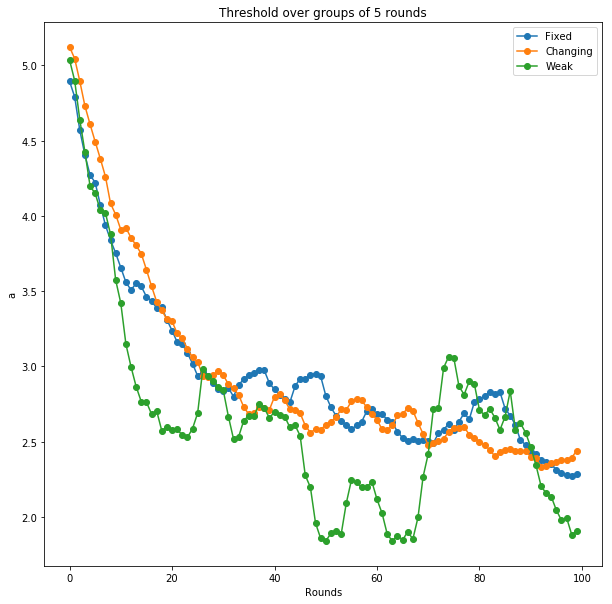

In [67]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")


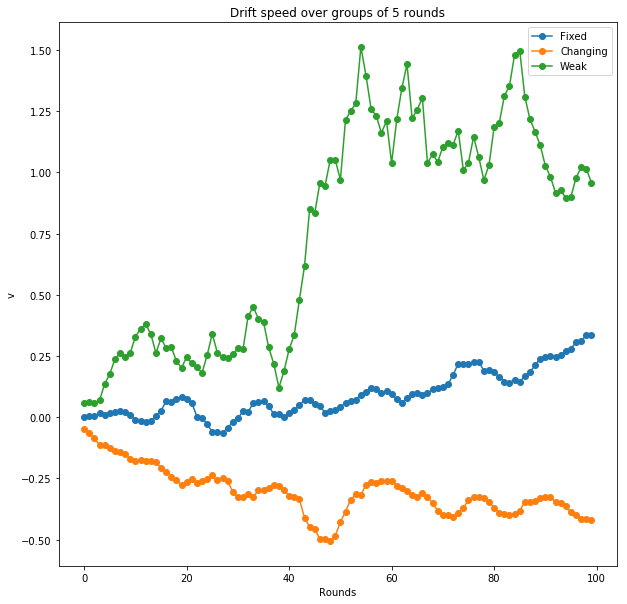

In [68]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

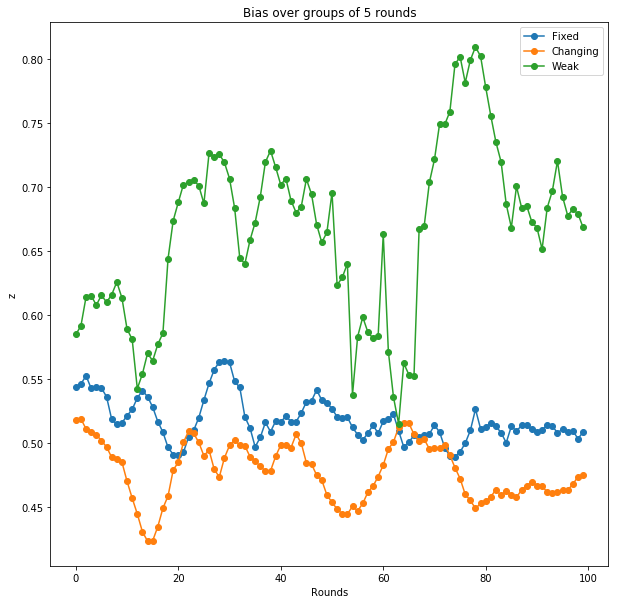

In [69]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

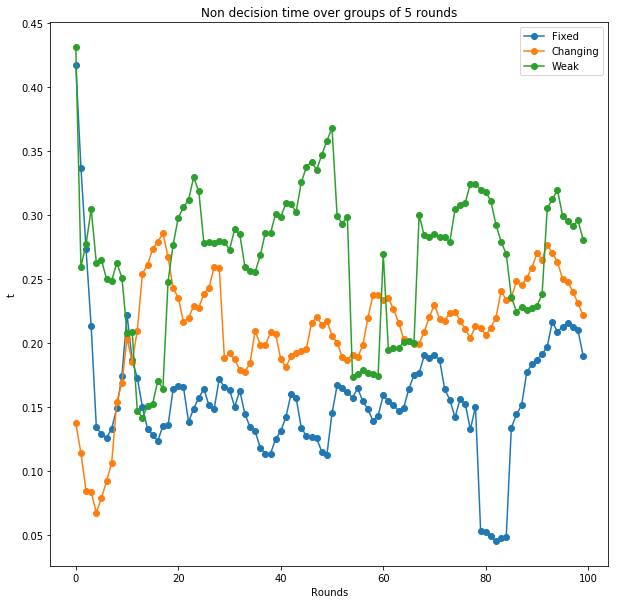

In [70]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

## Ten by ten rounds

In [ ]:
modeler = ddm.HDDMmodelMaker()
f_rounds = pd.DataFrame()
c_rounds = pd.DataFrame()
w_rounds = pd.DataFrame()


#Ten by Ten rounds
st=time.time()
rounds = range(0,10)

for r in rounds:
    print("Model: Fixed, round %d, time: %f" % (r * 10, time.time() - st))
    m_f = modeler.fit_model(fixed_s.loc[(fixed_s["round"] > (r * 10)) &  (fixed_s["round"] <= ((r+1) * 10))], 2000, 20)
    print("Model: changing, round %d, time: %f" % (r * 10, time.time() - st))
    m_c = modeler.fit_model(changing_s.loc[(changing_s["round"] > r * 10) &  (changing_s["round"] <= (r+1) * 10)], 2000, 20)
    print("Model: weak, round %d, time: %f" % (r * 10, time.time() - st))
    m_w = modeler.fit_model(weak_s.loc[(weak_s["round"] > r * 10) &  (weak_s["round"] <= (r+1) * 10)], 2000, 20)

    df_f = modeler.get_stats(m_f)
    df_c = modeler.get_stats(m_c)
    df_w = modeler.get_stats(m_w)
    df_f["round"] = r * 10
    df_c["round"] = r * 10
    df_w["round"] = r * 10
    if r == 1:
        f_rounds = df_f
        c_rounds = df_c
        w_rounds = df_w
    else:
        f_rounds = f_rounds.append(df_f, ignore_index=True)
        c_rounds = c_rounds.append(df_c, ignore_index=True)
        w_rounds = w_rounds.append(df_w, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*10) % 10 == 0:
        print("Rounds: %d" % r)
        f_rounds.to_csv("fixed_rounds10.csv")
        c_rounds.to_csv("changing_rounds10.csv")
        w_rounds.to_csv("weak_rounds10.csv")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "a", "Threshold over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "v", "Drift speed over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "z", "Bias over groups of 5 rounds")

In [ ]:
plot_rounds(f_rounds, c_rounds, w_rounds, "t", "Non decision time over groups of 5 rounds")

In [ ]:
#Reponse time vs threshold
plt.figure(figsize = (14,10))
f_thres = f_rounds.loc[f_rounds.parameter == "a", ["round", "mean"]]

plt.plot(fixed_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(f_thres["round"], f_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Fixed PD")


In [ ]:
#Changing 
plt.figure(figsize = (14,10))
c_thres = c_rounds.loc[c_rounds.parameter == "a", ["round", "mean"]]

plt.plot(changing_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(c_thres["round"], c_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Changing PD")


In [ ]:
#Weak
plt.figure(figsize = (14,10))
w_thres = w_rounds.loc[w_rounds.parameter == "a", ["round", "mean"]]

plt.plot(weak_s[["round", "rt"]].abs().groupby("round").mean(), "-o", label = "Response time")
plt.plot(w_thres["round"], w_thres["mean"], "-o", label = "Threshold a")
plt.legend(loc = "best")
plt.xlabel("Rounds")
plt.ylabel("RT | a")
plt.title("Threshold and Response time for Weak PD")

In [ ]:
a_values = []
for i in range(10):
    #np.random.seed(1234)
    #random.seed(1234)
    model = hddm.HDDM(fixed_s, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


In [ ]:
a_values

In [ ]:
cr = []
for i in range(1, 100):
    f_i = fixed_s.loc[fixed_s["round"] == i]
    cr.append(len(f_i.loc[f_i['response']==1])/float(len(f_i)))

z_fix = f_rounds.loc[f_rounds.parameter == "z", ["round", "mean"]]
plt.figure(figsize = (14,14))
plt.plot(range(1, 100), cr, "-o", label = "Cooperation rate")
plt.plot(z_fix["round"], z_fix["mean"], "-o", label = "Bias")
plt.legend(loc = "best")
plt.ylabel("Coop Rate | Bias")
plt.xlabel("Rounds")
plt.title("Cooperation rate and Bias over rounds for Fixed PD")


# Context analysis

We have the hypothesis that the reaction times and parameters differ when different contexts are taking place

How the people react when the previous action of the other player was X?

In [133]:
data = hddm.load_csv('./outputs/output_data.dat')
session = data["player"].str.split("_", n=1, expand=True)
data["session"] = session[0]
data["treatment"] = ""
data.loc[data["session"].isin(['s1m5', 's2m5', 's4m8', 's8n3', 's9n3', 's10n5']), 'treatment'] = "fix"
data.loc[data["session"].isin(['s5m20', 's6m22', 's7m22', 's11n9', 's12n11', 's13n12']), 'treatment'] = "changing"
data.loc[data["session"].isin(['s3m7']), 'treatment'] = "weak"
data2 = data
data = data.loc[data.treatment == "fix"]
data.head()

,round,player,action_player,opponent,action_opponent,payoff,time_php,time_js,who_played,session,treatment
1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,4600,user,s4m8,fix
1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4055,user,s4m8,fix
1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5394,user,s4m8,fix
1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7806,user,s4m8,fix
1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,15067,user,s4m8,fix


In [101]:
#Time intensive

data["actions"] = ""
nrounds = data["round"].unique()
players = data.player.unique()
for r in nrounds:
    for p in players:
        action1 = ""
        if r == 1: action1 = "00"
        else:
            action1 = "%s%s" % (data.loc[(data["round"] == r-1) & (data["player"] == p), "action_player"].item(),
                                data.loc[(data["round"] == r-1) & (data["player"] == p), "action_opponent"].item())
        data.loc[(data["round"] == r) & (data["player"] == p), ['actions']] = "%s%s" % (action1, data.loc[(data["round"] == r) & (data["player"] == p), "action_player"].item())


/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [2]:
data = hddm.load_csv("fixedActions.csv")
data.head()

,Unnamed: 0,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,response,abs_time,prev
0,1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,-4.600,user,s4m8,fix,00D,0,4.600,00
1,1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4.055,user,s4m8,fix,00C,1,4.055,00
2,1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5.394,user,s4m8,fix,00C,1,5.394,00
3,1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7.806,user,s4m8,fix,00C,1,7.806,00
4,1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,-15.067,user,s4m8,fix,00D,0,15.067,00


In [135]:
#Initial actions
defInitial = data.loc[data.actions == "00D"]
cooInitial = data.loc[data.actions == "00C"]

print("Defectors: %d, Cooperators %d" % (len(defInitial.index), len(cooInitial.index)))



Defectors: 27, Cooperators 31


In [136]:
defPlayers = data.loc[data.player.isin(defInitial.player.unique())]
cooPlayers = data.loc[data.player.isin(cooInitial.player.unique())]

defPlayers[['round', 'action_player']].groupby(['action_player']).agg("count")

,round
action_player,
C,1331
D,1369


Text(0,0.5,'Rounds')

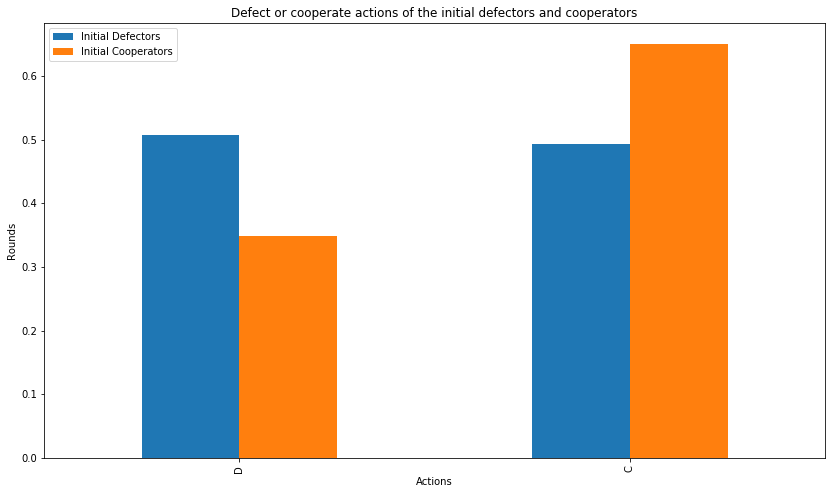

In [137]:
coop_counts = defPlayers['action_player'].value_counts(normalize = True).rename('Initial Defectors').to_frame()\
               .join(cooPlayers['action_player'].value_counts(normalize = True).rename('Initial Cooperators').to_frame())
coop_counts.plot(kind='bar',figsize=(14, 8), title = "Defect or cooperate actions of the initial defectors and cooperators")
plt.xlabel("Actions")
plt.ylabel("Rounds")

Text(0,0.5,'Rounds')

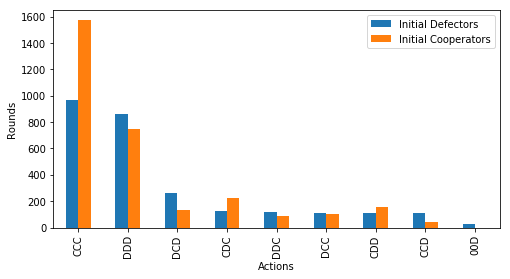

In [138]:

actions_counts = defPlayers['actions'].value_counts().rename('Initial Defectors').to_frame()\
               .join(cooPlayers['actions'].value_counts().rename('Initial Cooperators').to_frame())
actions_counts.plot(kind='bar',figsize=(8, 4))
plt.xlabel("Actions")
plt.ylabel("Rounds")

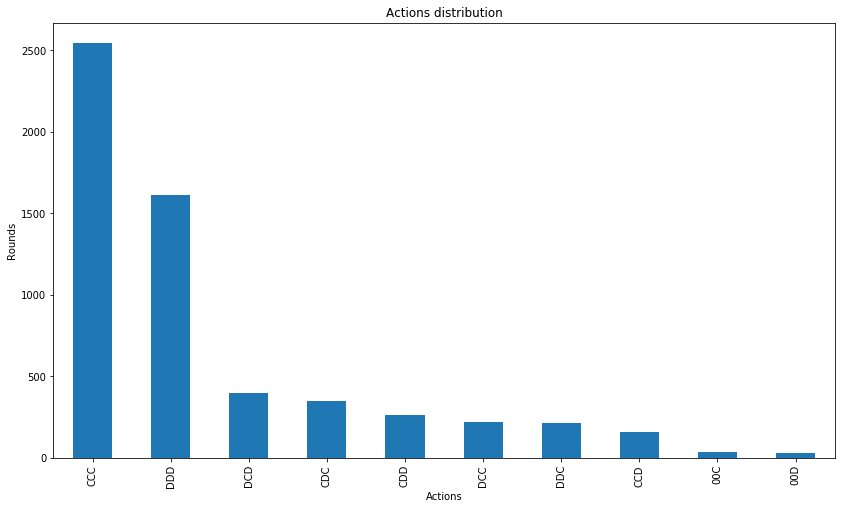

In [139]:
# Actions. How to read: XYZ = I did action X in the previous round, the opponent did action Y, hence I do action Z.


data['actions'].value_counts().plot(kind = "bar", figsize =(14, 8), title = "Actions distribution")
plt.xlabel("Actions")
plt.ylabel("Rounds")
plt.show()

In [140]:
#Some more format

#del data["who_played"], data["opponent"], data["payoff"], data["time_php"], data["action_opponent"]
#data.rename(columns={'time_js': 'rt'}, inplace=True)
#data['rt'] = data.rt.astype(int)
#data["response"] = data["action_player"]
#data.loc[data['response'] == "C", "response"] = 1.0
#data.loc[data['response'] == "D", "response"] = 0.0
#data["rt"] = data["rt"] / 1000
#data = hddm.utils.flip_errors(data)
#data["abs_time"] = data["rt"].abs()
#data.head()

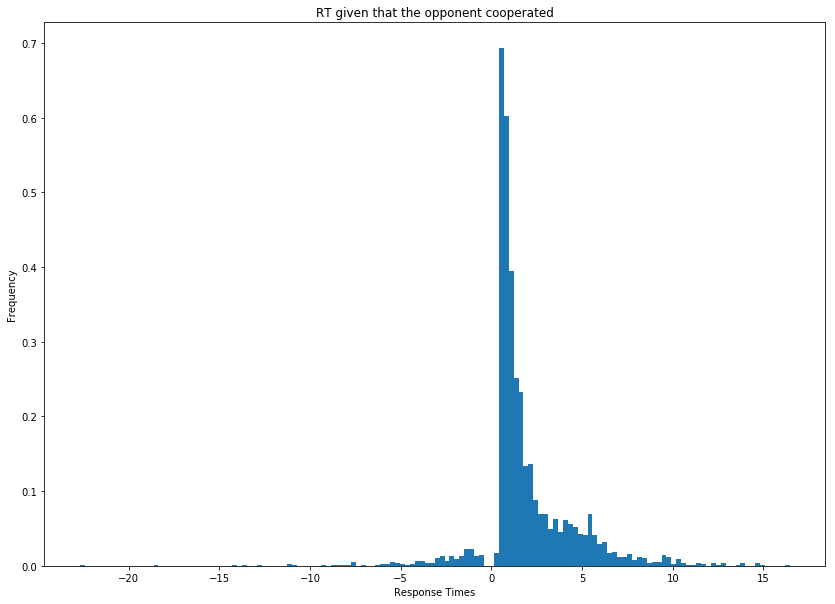

In [141]:
#Reaction times:
#Given than the opponent cooperated, cooperating seems faster.

prevCoop = data.loc[data.actions.isin(["CCD", "CCC"])]

plt.figure(figsize = (14,10))
plt.hist(prevCoop.rt, density = True, bins = "auto")
plt.xlabel("Response Times")
plt.ylabel("Frequency")
plt.title("RT given that the opponent cooperated")
plt.show()

In [142]:
#Test for equal distributions
cTime = prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]].values
dTime = np.array(prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]].values)
#cTime

In [143]:
st.kruskal(prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]], prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]])

KruskalResult(statistic=38.2303145975757, pvalue=6.286810964549385e-10)

In [144]:
prevCoop.loc[prevCoop.action_player == "C", ["abs_time"]].mean()

abs_time    2.211024
dtype: float64

In [145]:
prevCoop.loc[prevCoop.action_player == "D", ["abs_time"]].mean()

abs_time    3.330312
dtype: float64

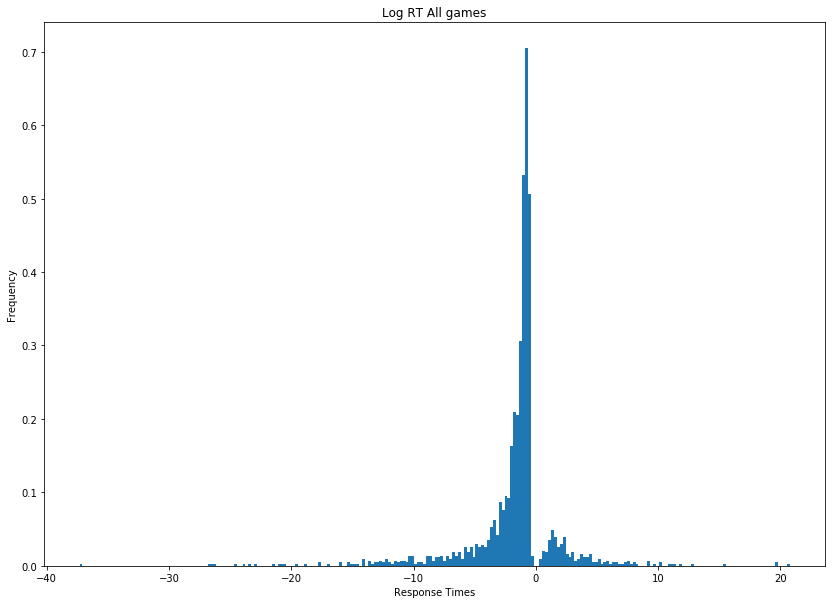

In [146]:
prevDef = data.loc[data.actions.isin(["DDC", "DDD"])]

plt.figure(figsize = (14,10))
plt.hist(prevDef.rt, density = True, bins = "auto")
plt.xlabel("Response Times")
plt.ylabel("Frequency")
plt.title("Log RT All games")
plt.show()

In [147]:
#Test for equal distributions
cTime = prevDef.loc[prevDef.action_player == "C", ["abs_time"]].values
dTime = np.array(prevDef.loc[prevDef.action_player == "D", ["abs_time"]].values)
#cTime

In [148]:
st.kruskal(cTime, dTime)

KruskalResult(statistic=82.87524043184794, pvalue=8.739909163755581e-20)

In [116]:
prevDef.loc[prevDef.action_player == "C", ["abs_time"]].mean()

abs_time    3.481327
dtype: float64

In [117]:
prevDef.loc[prevDef.action_player == "D", ["abs_time"]].mean()

abs_time    2.426271
dtype: float64

Text(0,0.5,'RT')

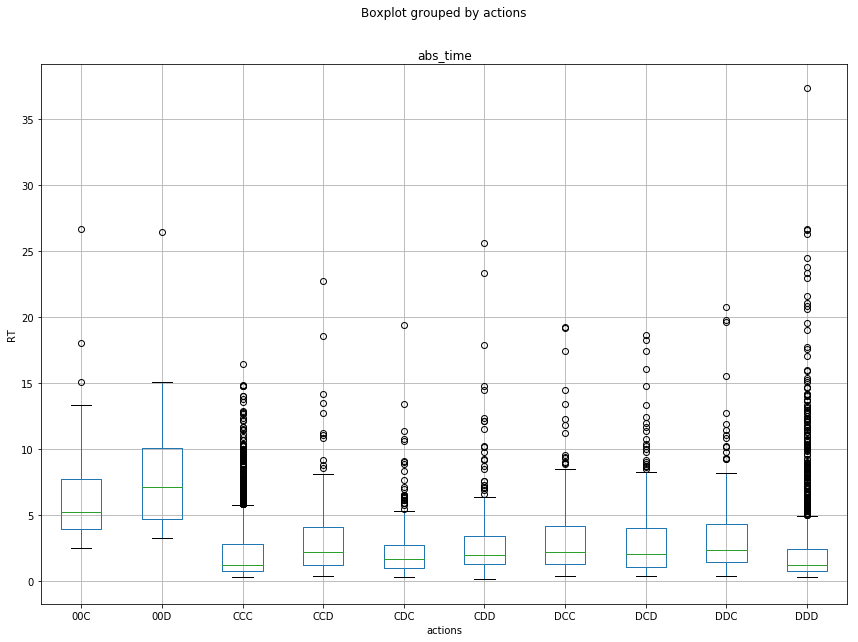

In [118]:

data.boxplot(column = "abs_time", by = "actions", figsize = (14,10))
plt.ylabel("RT")

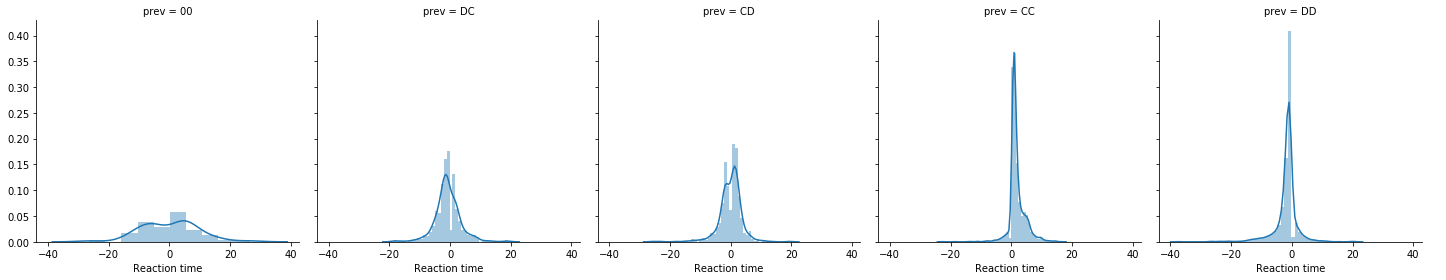

In [86]:
#userData = userData.sort_values(by = "session")
conData = data
conData["prev"] = conData.actions.str[:2]
g = sns.FacetGrid(conData, col="prev", height = 4)
g.map(sns.distplot, "rt")
g.add_legend()
g.set(xlabel = "Reaction time")

[Text(0,0.5,'Previous actions'),
 Text(0.5,0,'Row count'),
 Text(0.5,1,'Actions after given context. Fixed PD.')]

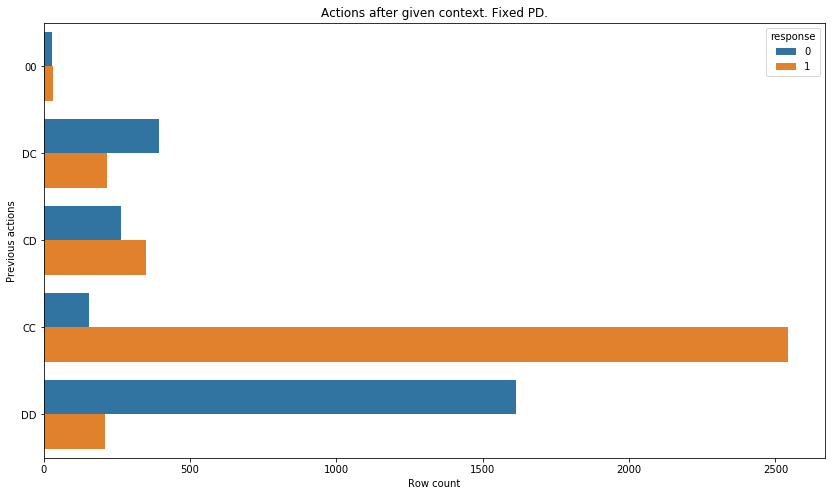

In [87]:
plt.figure(figsize = (14,8))
ax = sns.countplot(y="prev", hue="response", data=conData)
ax.set(xlabel='Row count', ylabel='Previous actions', title = "Actions after given context. Fixed PD.")


In [123]:
data.to_csv("fixedActions.csv")

In [121]:
def roundModel (data, column, window):
    groups = list(data[column].unique())
    print(groups)
    modeler = ddm.HDDMmodelMaker()
    st = time.time()
    rounds = range(0, 100)
    roundsDf = pd.DataFrame()
    for g in groups:
        df = data.loc[data[column]==g]
        print (str(df["round"].unique()))
        for r in rounds:
            try:
                model = modeler.fit_model(df.loc[(df["round"] >= r) & (df["round"] <= ((r + window)))], 5000, 200)
                print("\nModel: %s, round %d, time: %f\n" % (g, r, time.time() - st))
                modStats = modeler.get_stats(model)
                modStats["round"] = r
                if r == 0:
                    roundsDf = modStats
                else:
                    roundsDf = roundsDf.append(modStats, ignore_index = True)
                if r%10 == 0:
                    roundsDf.to_csv("%s_rounds.csv" % (g))
            except: break
        roundsDf.to_csv("%s_rounds.csv" % (g))

In [152]:
roundModel(data, "actions", 10)

['00D', '00C', 'DCD', 'CDC', 'CCC', 'CDD', 'CCD', 'DDC', 'DCC', 'DDD']
[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 12.3 sec
Model: 00D, round 0, time: 12.394315

 [-----------------100%-----------------] 5000 of 5000 complete in 12.4 sec
Model: 00D, round 1, time: 25.131589

[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 sec
Model: 00C, round 0, time: 37.991768

 [-----------------100%-----------------] 5000 of 5000 complete in 12.5 sec
Model: 00C, round 1, time: 50.802491

[  2   3   4   5   6   7  11  12  14  15  16  17  22  27  32  39  40  42
  44  48  49  50  53  54  57  58  69  72  81  89  95  97   8  10  13  19
  20  21  24  25  28  29  31  33  34  35  36  37  41  43  45  46  47  51
  52  55  56  59  60  61  62  63  64  65  66  67  68  70  71  74  75  76
  78  79  80  85  86  91  93  96  98 100   9  18  26  30  38  73  77  84
  87  88  90  92  94  99  23]
 [-----------------100%-----------------] 5000 of 5000 complete in 10.

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model: CDC, round 31, time: 851.822044

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 32, time: 856.761939

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 33, time: 861.698135

 [-----------------100%-----------------] 5000 of 5000 complete in 4.5 sec
Model: CDC, round 34, time: 866.599940

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 35, time: 871.539152

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 36, time: 876.524072

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 37, time: 881.464110

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: CDC, round 38, time: 886.395998

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model

 [-----------------100%-----------------] 5000 of 5000 complete in 8.7 sec
Model: CCC, round 0, time: 1226.861724

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 1, time: 1236.043115

 [-----------------100%-----------------] 5000 of 5000 complete in 8.9 sec
Model: CCC, round 2, time: 1245.372045

 [-----------------100%-----------------] 5000 of 5000 complete in 8.9 sec
Model: CCC, round 3, time: 1254.630267

 [-----------------100%-----------------] 5000 of 5000 complete in 9.1 sec
Model: CCC, round 4, time: 1264.104034

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 5, time: 1273.258364

 [-----------------100%-----------------] 5000 of 5000 complete in 8.6 sec
Model: CCC, round 6, time: 1282.272736

 [-----------------100%-----------------] 5000 of 5000 complete in 8.8 sec
Model: CCC, round 7, time: 1291.452290

 [-----------------100%-----------------] 5000 of 5000 complete in 9.6 sec
Model

 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 sec
Model: CCC, round 71, time: 1840.416602

 [-----------------100%-----------------] 5000 of 5000 complete in 8.4 sec
Model: CCC, round 72, time: 1849.149470

 [-----------------100%-----------------] 5000 of 5000 complete in 8.5 sec
Model: CCC, round 73, time: 1858.044801

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CCC, round 74, time: 1867.702514

 [-----------------100%-----------------] 5000 of 5000 complete in 9.5 sec
Model: CCC, round 75, time: 1877.598787

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 sec
Model: CCC, round 76, time: 1887.356501

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 sec
Model: CCC, round 77, time: 1897.130293

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CCC, round 78, time: 1906.812470

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 s

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 7, time: 2805.606492

 [-----------------100%-----------------] 5000 of 5000 complete in 7.4 sec
Model: CCD, round 8, time: 2813.351806

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: CCD, round 9, time: 2821.629199

 [-----------------100%-----------------] 5000 of 5000 complete in 7.5 sec
Model: CCD, round 10, time: 2829.512776

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 11, time: 2837.191812

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: CCD, round 12, time: 2844.656010

 [-----------------100%-----------------] 5000 of 5000 complete in 7.3 sec
Model: CCD, round 13, time: 2852.326461

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: CCD, round 14, time: 2860.496286

 [-----------------100%-----------------] 5000 of 5000 complete in 7.7 sec


 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 78, time: 3254.576960

 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 79, time: 3260.052764

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: CCD, round 80, time: 3265.437208

 [-----------------100%-----------------] 5000 of 5000 complete in 5.1 sec
Model: CCD, round 81, time: 3270.921028

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: CCD, round 82, time: 3276.668218

 [-----------------100%-----------------] 5000 of 5000 complete in 6.0 sec
Model: CCD, round 83, time: 3283.069767

 [-----------------100%-----------------] 5000 of 5000 complete in 5.5 sec
Model: CCD, round 84, time: 3289.061719

 [-----------------100%-----------------] 5000 of 5000 complete in 5.2 sec
Model: CCD, round 85, time: 3294.692553

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 s

 [-----------------100%-----------------] 5000 of 5000 complete in 7.2 sec
Model: DDC, round 46, time: 3730.570270

 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 sec
Model: DDC, round 47, time: 3739.029916

 [-----------------100%-----------------] 5000 of 5000 complete in 7.8 sec
Model: DDC, round 48, time: 3747.285739

 [-----------------100%-----------------] 5000 of 5000 complete in 7.6 sec
Model: DDC, round 49, time: 3755.320035

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: DDC, round 50, time: 3762.892842

 [-----------------100%-----------------] 5000 of 5000 complete in 6.7 sec
Model: DDC, round 51, time: 3769.985668

 [-----------------100%-----------------] 5000 of 5000 complete in 6.9 sec
Model: DDC, round 52, time: 3777.303602

 [-----------------100%-----------------] 5000 of 5000 complete in 6.6 sec
Model: DDC, round 53, time: 3784.337960

 [-----------------100%-----------------] 5000 of 5000 complete in 6.9 s

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: DCC, round 84, time: 4670.882264

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: DCC, round 85, time: 4676.316586

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: DCC, round 86, time: 4682.114809

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DCC, round 87, time: 4687.848797

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DCC, round 88, time: 4693.622342

 [-----------------100%-----------------] 5000 of 5000 complete in 6.4 sec
Model: DCC, round 89, time: 4700.481813

 [-----------------100%-----------------] 5000 of 5000 complete in 7.1 sec
Model: DCC, round 90, time: 4708.062135

 [-----------------100%-----------------] 5000 of 5000 complete in 7.7 sec
Model: DCC, round 91, time: 4716.185378

 [-----------------100%-----------------] 5000 of 5000 complete in 7.6 s

In [23]:
def plot_rounds_context(groups, param, title, normalize = False):
    plt.figure(figsize = (10,10))
    for g in groups:
        data = pd.read_csv("./outputs/%s_rounds.csv" % (g))
        param_df = data.loc[(data.parameter == param), ["mean", "round"]]
        if normalize:
            if param == "v":
                param_df["mean"] = param_df["mean"].abs()
        plt.plot(param_df["round"],param_df["mean"], "-o", label = g)
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

In [100]:
#Overlapping rounds

modeler = ddm.HDDMmodelMaker()
CC_rounds = pd.DataFrame()
CD_rounds = pd.DataFrame()
DC_rounds = pd.DataFrame()
DD_rounds = pd.DataFrame()


#Five by five rounds
st=time.time()
rounds = range(0,100)

for r in rounds:
    print("\nModel: CC, round %d, time: %f\n" % (r, time.time() - st))
    m_CC = modeler.fit_model(CCdf.loc[(CCdf["round"] >= r) &  (CCdf["round"] <= ((r+5)))], 5000, 200)
    print("\nModel: CD, round %d, time: %f\n" % (r, time.time() - st))
    m_CD = modeler.fit_model(CDdf.loc[(CDdf["round"] >= r) &  (CDdf["round"] <= (r+5))], 5000, 200)
    print("\nModel: DC, round %d, time: %f\n" % (r, time.time() - st))
    m_DC = modeler.fit_model(DCdf.loc[(DCdf["round"] >= r) &  (DCdf["round"] <= (r+5))], 5000, 200)
    print("\nModel: DD, round %d, time: %f\n" % (r, time.time() - st))
    m_DD = modeler.fit_model(DDdf.loc[(DDdf["round"] >= r) &  (DDdf["round"] <= (r+5))], 5000, 200)

    df_CC = modeler.get_stats(m_CC)
    df_CD = modeler.get_stats(m_CD)
    df_DC = modeler.get_stats(m_DC)
    df_DD = modeler.get_stats(m_DD)
    df_CC["round"] = r 
    df_CD["round"] = r 
    df_DC["round"] = r 
    df_DD["round"] = r 
    if r == 0:
        CC_rounds = df_CC
        CD_rounds = df_CD
        DC_rounds = df_DC
        DD_rounds = df_DD
    else:
        CC_rounds = CC_rounds.append(df_CC, ignore_index=True)
        CD_rounds = CD_rounds.append(df_CD, ignore_index=True)
        DC_rounds = DC_rounds.append(df_DC, ignore_index=True)
        DD_rounds = DD_rounds.append(df_DD, ignore_index=True)
    #print("Rounds: %d" % r)
    if (r*5) % 10 == 0:
        print("Rounds: %d" % r)
        CC_rounds.to_csv("CC_rounds.csv")
        CD_rounds.to_csv("CD_rounds.csv")
        DC_rounds.to_csv("DC_rounds.csv")
        DD_rounds.to_csv("DD_rounds.csv")
CC_rounds.to_csv("CC_rounds.csv")
CD_rounds.to_csv("CD_rounds.csv")
DC_rounds.to_csv("DC_rounds.csv")
DD_rounds.to_csv("DD_rounds.csv")


Model: CC, round 0, time: 0.000645

 [-----------------100%-----------------] 5000 of 5000 complete in 8.0 sec
Model: CD, round 0, time: 8.061327

 [-----------------100%-----------------] 5000 of 5000 complete in 10.0 sec
Model: DC, round 0, time: 18.176348

 [-----------------100%-----------------] 5000 of 5000 complete in 8.6 sec
Model: DD, round 0, time: 26.890924

 [-----------------100%-----------------] 5000 of 5000 complete in 9.4 secRounds: 0

Model: CC, round 1, time: 36.891776

 [-----------------100%-----------------] 5000 of 5000 complete in 8.1 sec
Model: CD, round 1, time: 45.090712

 [-----------------100%-----------------] 5000 of 5000 complete in 9.1 sec
Model: DC, round 1, time: 54.314754

 [-----------------100%-----------------] 5000 of 5000 complete in 8.2 sec
Model: DD, round 1, time: 62.601492

 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec
Model: CC, round 2, time: 72.398692

 [-----------------100%-----------------] 5000 of 5000 co

 [-----------------100%-----------------] 5000 of 5000 complete in 5.3 sec
Model: DD, round 35, time: 1481.564759

 [-----------------100%-----------------] 5000 of 5000 complete in 5.8 sec
Model: CC, round 36, time: 1488.015052

 [-----------------100%-----------------] 5000 of 5000 complete in 6.7 sec
Model: CD, round 36, time: 1494.822803

 [-----------------100%-----------------] 5000 of 5000 complete in 5.4 sec
Model: DC, round 36, time: 1500.315591

 [-----------------100%-----------------] 5000 of 5000 complete in 4.7 sec
Model: DD, round 36, time: 1505.070757

 [-----------------100%-----------------] 5000 of 5000 complete in 5.7 secRounds: 36

Model: CC, round 37, time: 1511.471471

 [-----------------100%-----------------] 5000 of 5000 complete in 6.4 sec
Model: CD, round 37, time: 1518.002246

 [-----------------100%-----------------] 5000 of 5000 complete in 5.9 sec
Model: DC, round 37, time: 1524.031974

 [-----------------100%-----------------] 5000 of 5000 complete in 4.

 [-----------------100%-----------------] 5000 of 5000 complete in 4.6 sec
Model: DD, round 70, time: 2245.931183

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 secRounds: 70

Model: CC, round 71, time: 2251.743248

 [-----------------100%-----------------] 5000 of 5000 complete in 5.8 sec
Model: CD, round 71, time: 2257.691470

 [-----------------100%-----------------] 5000 of 5000 complete in 4.4 sec
Model: DC, round 71, time: 2262.191785

 [-----------------100%-----------------] 5000 of 5000 complete in 4.4 sec
Model: DD, round 71, time: 2266.677130

 [-----------------100%-----------------] 5000 of 5000 complete in 5.0 sec
Model: CC, round 72, time: 2272.426615

 [-----------------100%-----------------] 5000 of 5000 complete in 6.0 sec
Model: CD, round 72, time: 2278.486654

 [-----------------100%-----------------] 5000 of 5000 complete in 4.5 sec
Model: DC, round 72, time: 2283.061982

 [-----------------100%-----------------] 5000 of 5000 complete in 4.

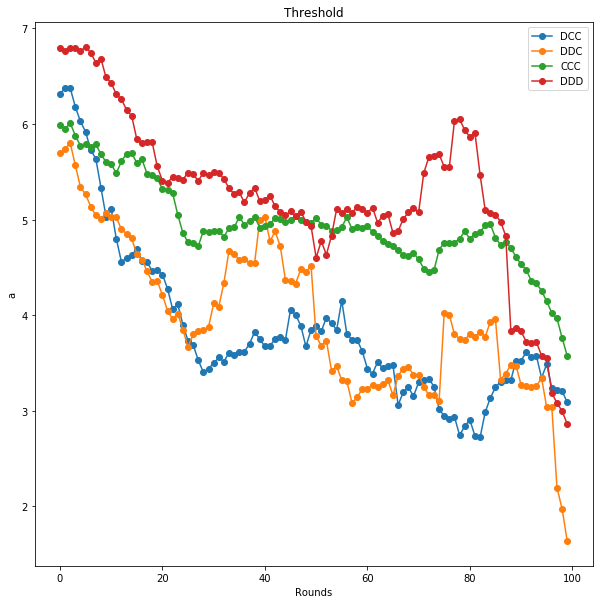

In [31]:
plot_rounds_context(["DCC", "DDC", "CCC", "DDD"], "a", "Threshold")

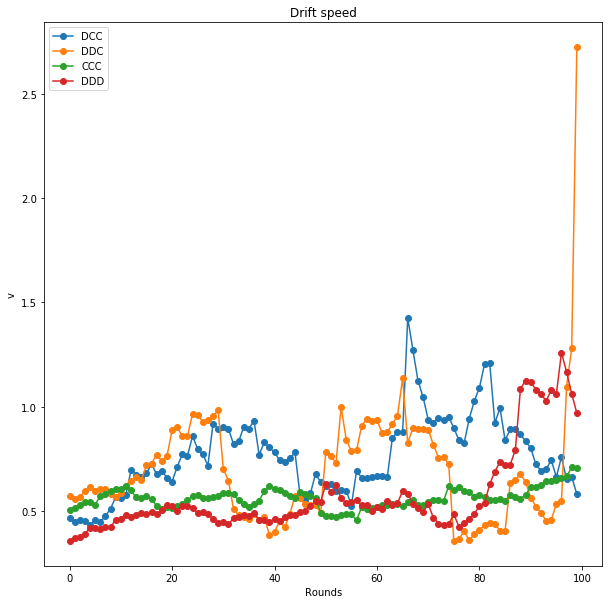

In [32]:
plot_rounds_context(["DCC", "DDC", "CCC", "DDD"], "v", "Drift speed", normalize = True)

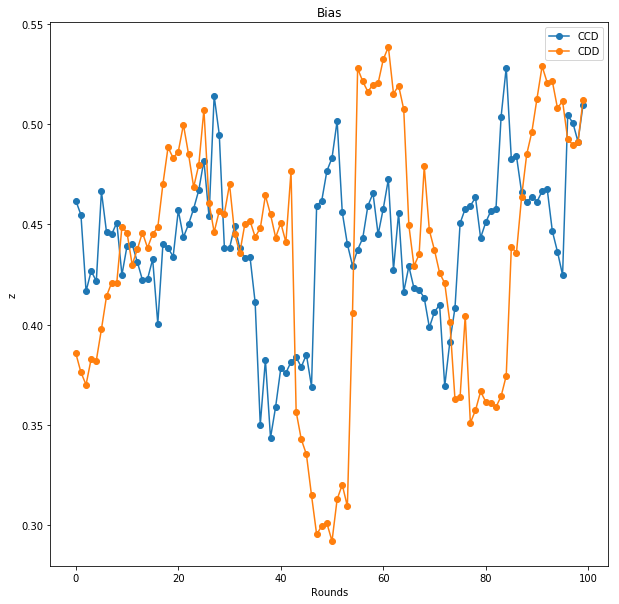

In [26]:
plot_rounds_context(["CCD", "CDD"], "z", "Bias")

In [7]:
def actionChange(actions1, actions2, user1, user2, rt):
    if len(actions1) != len(actions2): return "Lenghts mismatch" #Raise exception
    rounds = len(actions1)
    prev1 = ""
    prev2 = ""
    switch_events = pd.DataFrame(columns=["type", "lag", "subject", "round", "rt"])
    lag = 0
    for r in range(0, rounds):
        if r ==0:
            prev1 = actions1[r]
            prev2 = actions2[r]
            lag += 1
            continue
        elif actions1[r] != prev1:
            switch_events = switch_events.append(
                {"context": prev2, "type": "%s%s" % (prev1, actions1[r]),
                 "lag": lag, "subject": user1, "round": r + 1, "rt": rt[r]}, ignore_index=True)
            lag = 0
        if actions2[r] == prev2:
            lag += 1
        else: lag = 1
        prev1 = actions1[r]
        prev2 = actions2[r]
    return switch_events

In [76]:
def actionCounts(actions, user):
    prosocial = ['CCC', 'CDC', '00C', 'DDC', 'DCC']
    proself = ['DDD', 'DCD', '00D', 'CCD', 'CDD']
    rating = 0
    act_df = {'user':user,'00D':0,'00C':0,'DCD':0,'CDC':0,'CCC':0,'CDD':0,'CCD':0,'DDC':0,'DCC':0,'DDD':0, 'type':""}
    for a in actions:
        act_df[a] = act_df[a] + 1
        if a in prosocial:
            rating = rating + 1
        else: rating = rating - 1
    if rating >= 0: act_df["type"] = "Pro-social"
    else: act_df["type"] = "Pro-self"
    return act_df

print(actionCounts(fix.actions, ""))

{'CDD': 263, 'user': '', 'DDC': 211, 'CCD': 154, 'CCC': 2542, 'DDD': 1613, '00C': 31, '00D': 27, 'DCD': 395, 'CDC': 348, 'DCC': 216, 'type': 'Pro-social'}


In [9]:
data

,Unnamed: 0,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,response,abs_time,prev
0,1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,-4.600,user,s4m8,fix,00D,0,4.600,00
1,1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4.055,user,s4m8,fix,00C,1,4.055,00
2,1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5.394,user,s4m8,fix,00C,1,5.394,00
3,1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7.806,user,s4m8,fix,00C,1,7.806,00
4,1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,-15.067,user,s4m8,fix,00D,0,15.067,00
5,1805,1,s4m8_usuario10,C,['s4m8_usuario9'],D,0,12510.700226,12.483,user,s4m8,fix,00C,1,12.483,00
6,1806,1,s4m8_usuario8,C,['s4m8_usuario1'],C,3,10614.599943,10.559,user,s4m8,fix,00C,1,10.559,00
7,1807,1,s4m8_usuario1,C,['s4m8_usuario8'],C,3,4645.099878,4.622,user,s4m8,fix,00C,1,4.622,00
8,1808,1,s4m8_usuario11,D,['s4m8_usuario4'],D,1,26435.199976,-26.404,user,s4m8,fix,00D,0,26.404,00
9,1809,1,s4m8_usuario4,D,['s4m8_usuario11'],D,1,4593.400002,-4.568,user,s4m8,fix,00D,0,4.568,00


In [10]:
#dataC.to_csv("changingActions.csv")

In [11]:
#First, for fixed treatment:
#The subjects that are not in this list is because they played a pure strategy

fix = data.loc[(data.treatment == "fix")]
switches = pd.DataFrame()
actions = pd.DataFrame()
users = data.player.unique()
for u in users:
    df = fix.loc[fix.player == u]
    df = df.sort_values(by = "round", ascending = True)
    opp = str(df.opponent.unique())
    acc1 = df.action_player.values
    acc2 = df.action_opponent.values
    rt = df["rt"].values
    switches = switches.append(actionChange(acc1, acc2, u, opp, rt))
    actions = actions.append(actionCounts(df.actions, u), ignore_index=True)
switches   

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,context,lag,round,rt,subject,type
0,C,2,3,8.987,s4m8_usuario2,DC
1,D,1,4,-5.750,s4m8_usuario2,CD
2,D,1,5,10.820,s4m8_usuario2,DC
0,D,2,3,-1.953,s4m8_usuario7,CD
1,D,1,5,5.972,s4m8_usuario7,DC
0,D,1,3,4.439,s4m8_usuario9,DC
0,D,1,2,-4.505,s4m8_usuario10,CD
1,C,1,4,17.387,s4m8_usuario10,DC
0,C,1,2,-18.521,s4m8_usuario8,CD
1,C,1,3,8.841,s4m8_usuario8,DC


In [12]:
#There are 4 cases:

#Retaliation: I cooperated after a number of rounds of you defecting, then I defected too: context = D type = CD
#Assimilation: I defected after a number of rounds of you cooperating, then I cooperated: context C type DC
#Opportunistic: We both cooperated for a number of rounds, then I defected: context C type = CD
#Conscientization: We both defected for a number of rounds, then I cooperated: context D type = DC

print(switches.loc[(switches.context == "D") & (switches.type == "CD")].lag.value_counts())
print(switches.loc[(switches.context == "C") & (switches.type == "DC")].lag.value_counts())

1    184
2     57
3     11
4      9
6      1
5      1
Name: lag, dtype: int64
1     142
2      50
3      13
4       3
7       2
5       2
12      1
9       1
8       1
6       1
Name: lag, dtype: int64


In [13]:
print(switches.loc[(switches.context == "C") & (switches.type == "CD")].lag.value_counts())
print(switches.loc[(switches.context == "D") & (switches.type == "DC")].lag.value_counts())

1     67
2     47
3     16
6      6
4      4
8      3
15     2
5      2
26     1
19     1
18     1
13     1
11     1
9      1
7      1
Name: lag, dtype: int64
1     101
2      39
3      16
4      10
5      10
6       6
9       5
7       4
11      3
10      3
18      2
24      2
12      1
26      1
14      1
8       1
39      1
32      1
16      1
34      1
57      1
30      1
Name: lag, dtype: int64


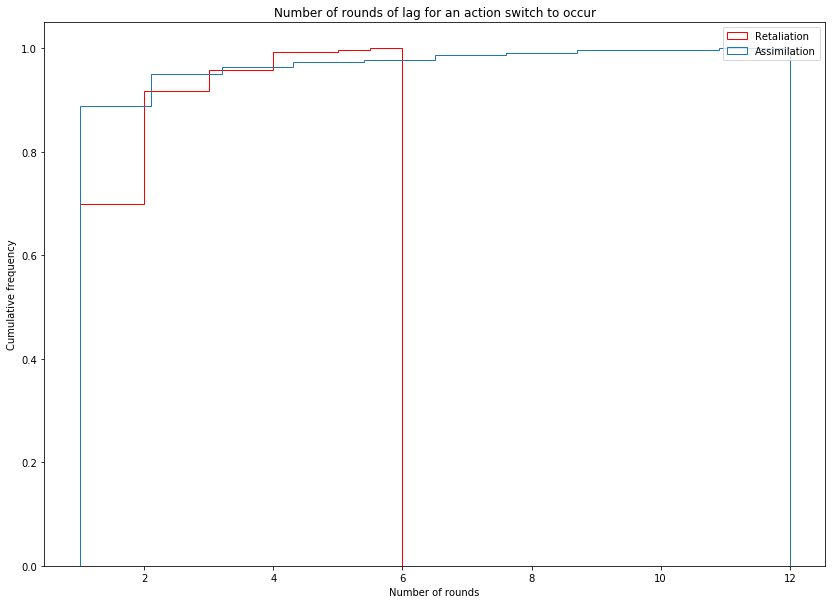

In [153]:


plt.figure(figsize = (14,10))
switches.loc[(switches.context == "D") & (switches.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == "C") & (switches.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to occur")
plt.show()

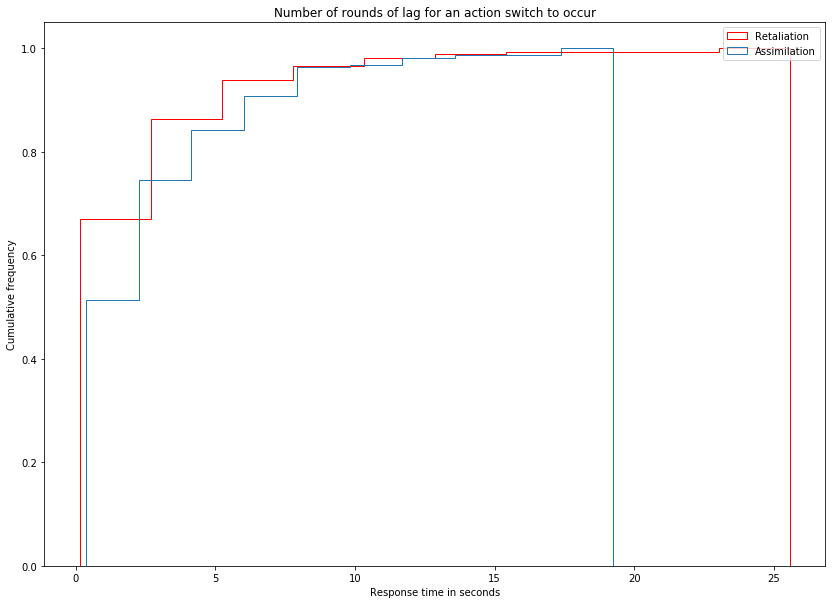

In [154]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "D") & (switches.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == "C") & (switches.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Number of rounds of lag for an action switch to occur")
plt.show()

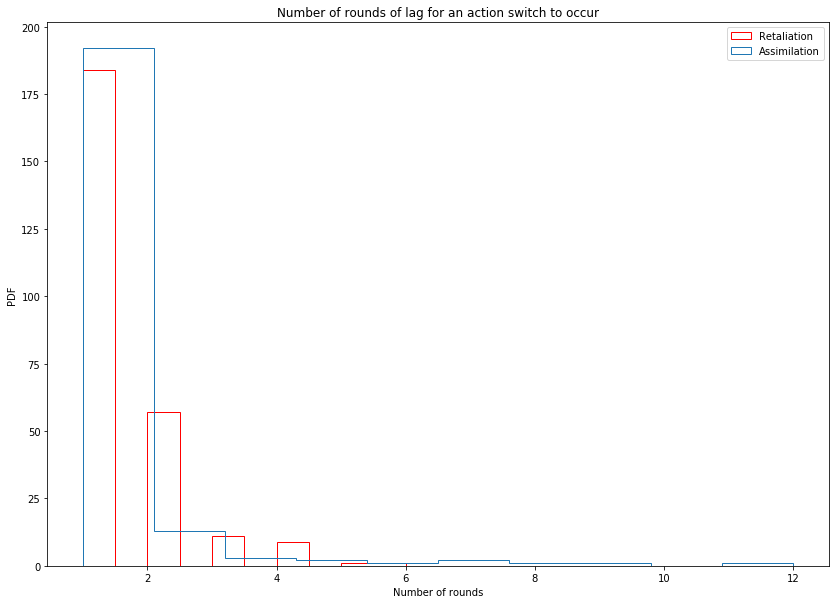

In [155]:


plt.figure(figsize = (14,10))
switches.loc[(switches.context == "D") & (switches.type == "CD")].lag.plot(
    kind = "hist",
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == "C") & (switches.type == "DC")].lag.plot(
    kind = "hist",
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("PDF")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to occur")
plt.show()

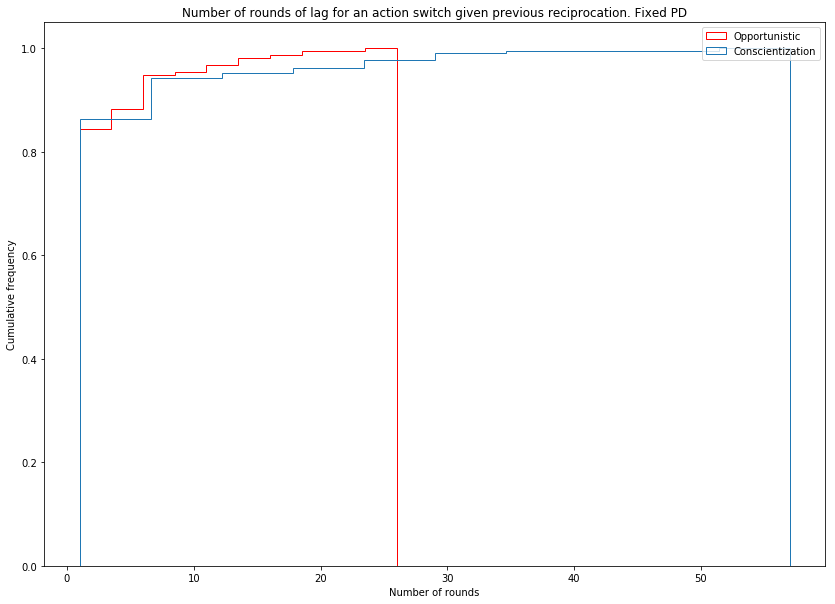

In [88]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "C") & (switches.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches.loc[(switches.context == "D") & (switches.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch given previous reciprocation. Fixed PD")
plt.show()

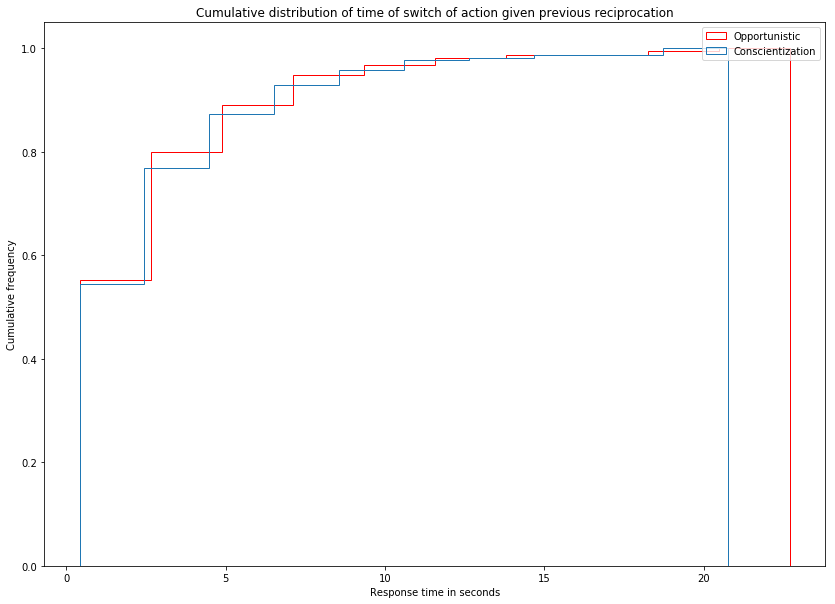

In [157]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "C") & (switches.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches.loc[(switches.context == "D") & (switches.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Cumulative distribution of time of switch of action given previous reciprocation")
plt.show()

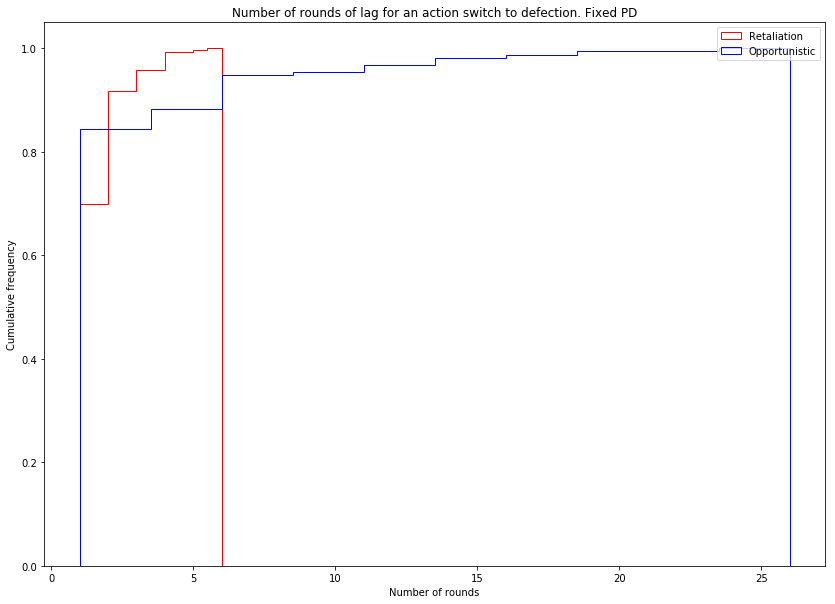

In [94]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "D") & (switches.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == "C") & (switches.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "b",
    label = "Opportunistic")

plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to defection. Fixed PD")
plt.show()

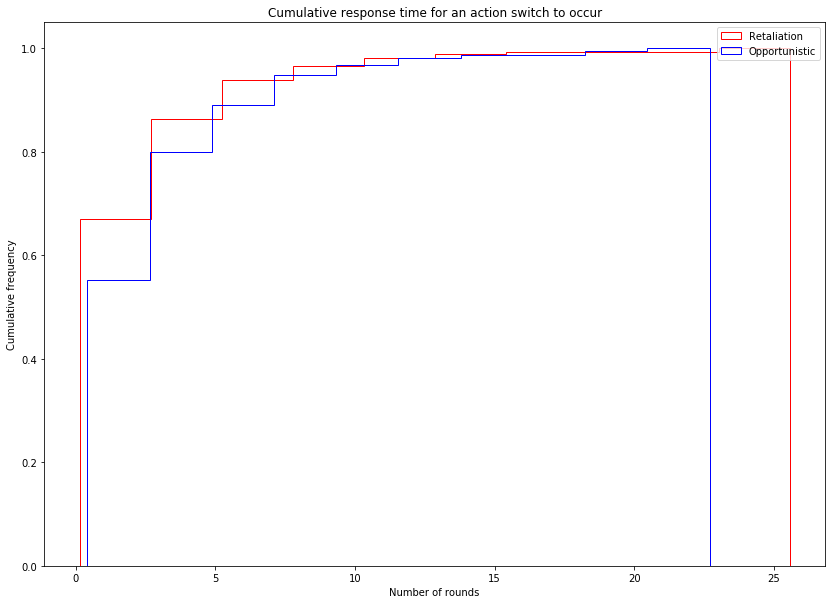

In [17]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "D") & (switches.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches.loc[(switches.context == "C") & (switches.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "b",
    label = "Opportunistic")

plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Cumulative response time for an action switch to occur")
plt.show()

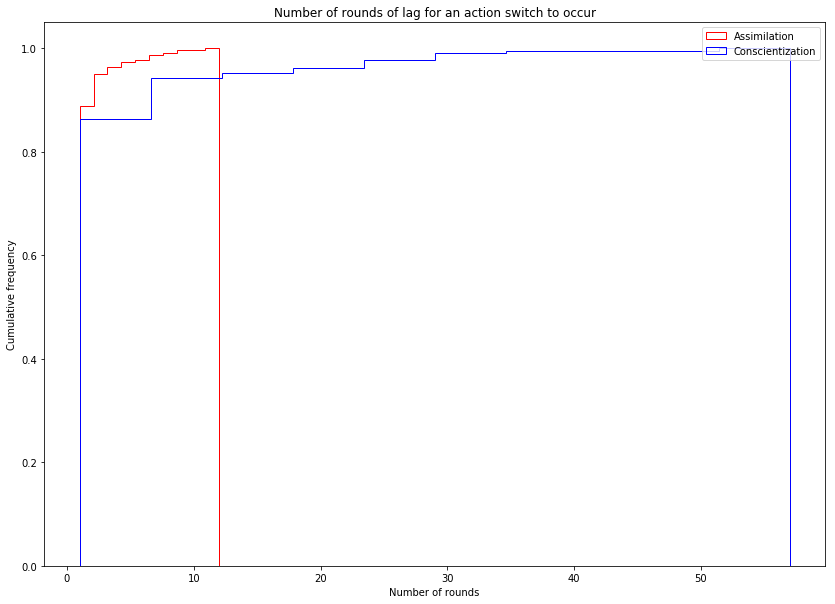

In [20]:
plt.figure(figsize = (14,10))
switches.loc[(switches.context == "C") & (switches.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Assimilation")

switches.loc[(switches.context == "D") & (switches.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "b",
    label = "Conscientization")

plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to occur")
plt.show()

In [159]:
actions.to_csv("actionsF.csv")

In [160]:
actions["type"] = ""
prosocial = ['CCC', 'CDC', '00C', 'DDC', 'DCC']
proself = ['DDD', 'DCD', '00D', 'CCD', 'CDD']
for u in actions.user.unique():
    rating = 0
    for p in prosocial:
        rating += (actions.loc[actions.user == u, p] * 1)
    for s in proself:
        rating += (actions.loc[actions.user == u, s] * (-1))
    if int(rating) > 0: 
        actions.loc[actions.user == u, "type"] = "Pro-social"
    else: 
        actions.loc[actions.user == u, "type"] = "Pro-self"
actions["type"].value_counts()

Pro-social    34
Pro-self      24
Name: type, dtype: int64

In [161]:
social_subj = actions.loc[actions["type"] == "Pro-social", "user"]
self_subj = actions.loc[actions["type"] == "Pro-self", "user"]

switches_soc = switches.loc[switches.subject.isin(social_subj)]
switches_self = switches.loc[switches.subject.isin(self_subj)]


In [162]:
print ("self: %d social: %d" % (len(switches_self), len(switches_soc)))

self: 421 social: 423


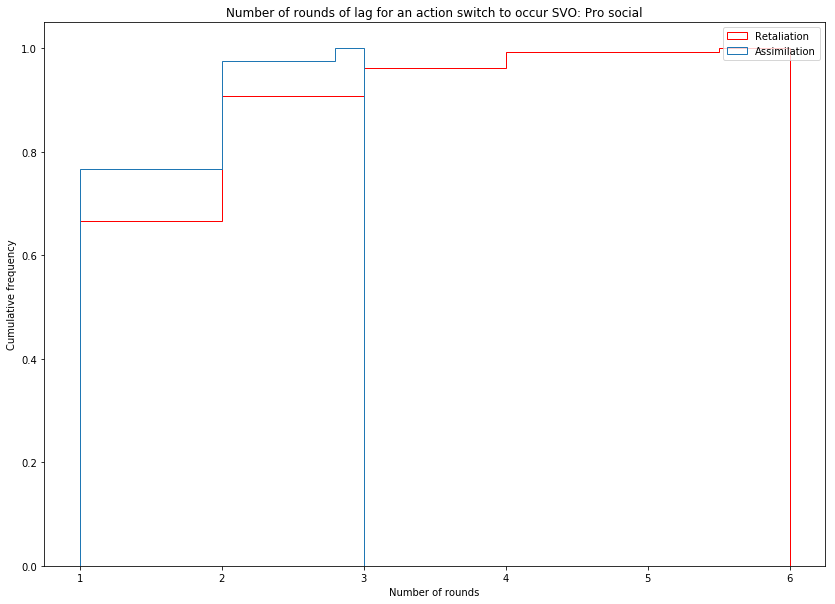

In [163]:
plt.figure(figsize = (14,10))
switches_soc.loc[(switches_soc.context == "D") & (switches_soc.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches_soc.loc[(switches_soc.context == "C") & (switches_soc.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to occur SVO: Pro social")
plt.show()

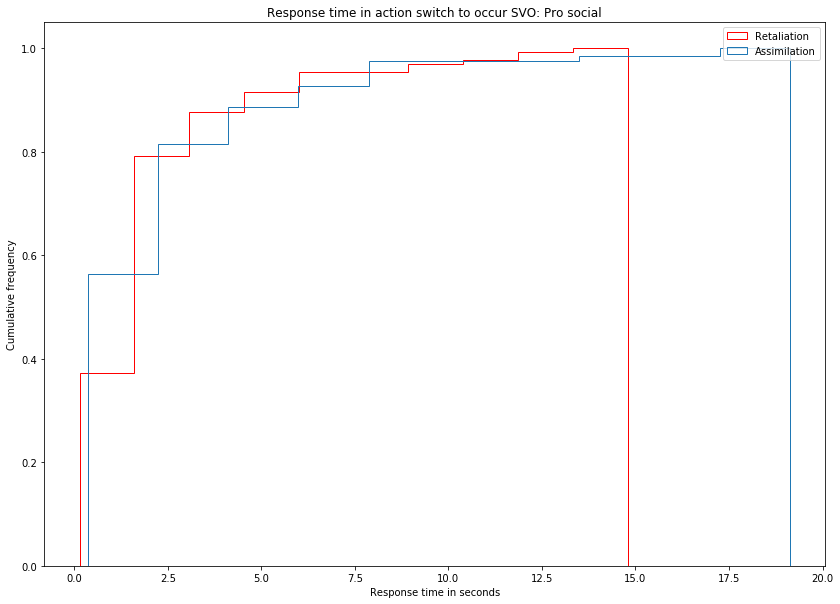

In [164]:
plt.figure(figsize = (14,10))
switches_soc.loc[(switches_soc.context == "D") & (switches_soc.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches_soc.loc[(switches_soc.context == "C") & (switches_soc.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Response time in action switch to occur SVO: Pro social")
plt.show()

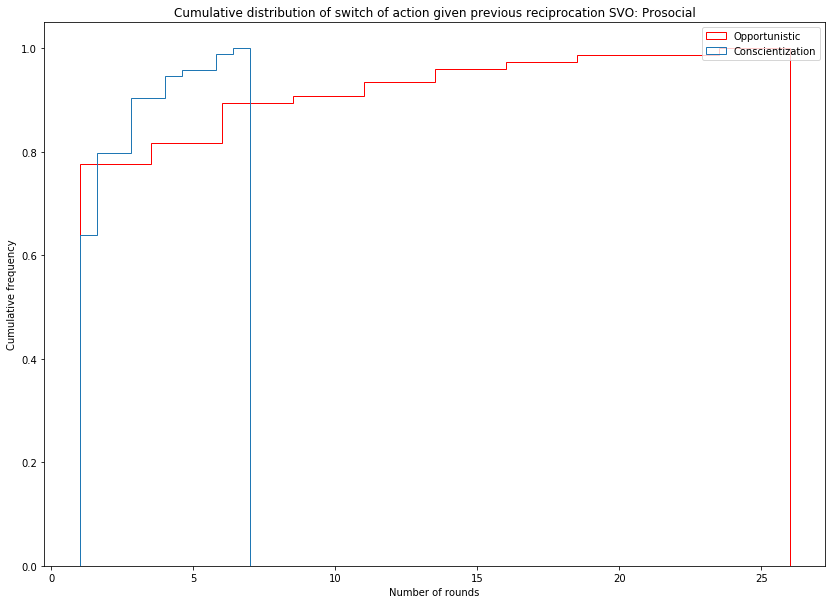

In [165]:
plt.figure(figsize = (14,10))
switches_soc.loc[(switches_soc.context == "C") & (switches_soc.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches_soc.loc[(switches_soc.context == "D") & (switches_soc.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Cumulative distribution of switch of action given previous reciprocation SVO: Prosocial")
plt.show()

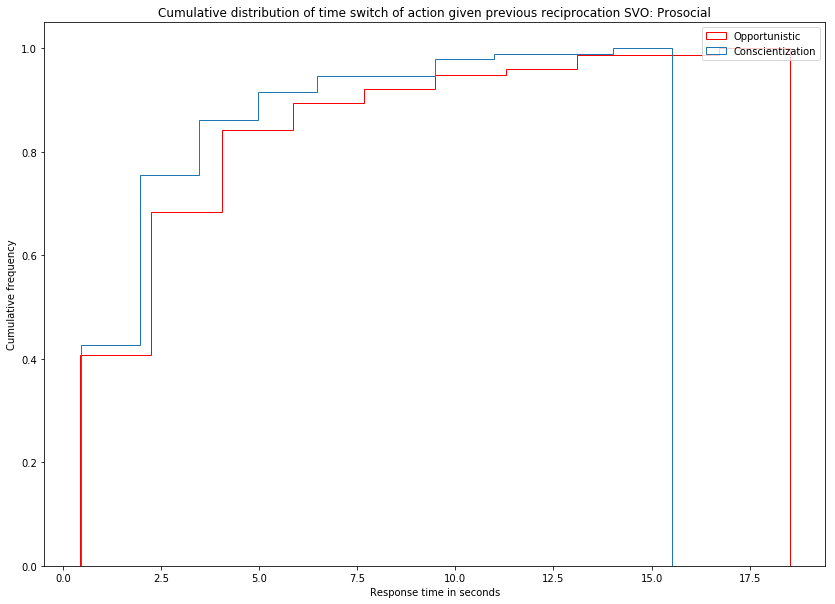

In [166]:
plt.figure(figsize = (14,10))
switches_soc.loc[(switches_soc.context == "C") & (switches_soc.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches_soc.loc[(switches_soc.context == "D") & (switches_soc.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Cumulative distribution of time switch of action given previous reciprocation SVO: Prosocial")
plt.show()

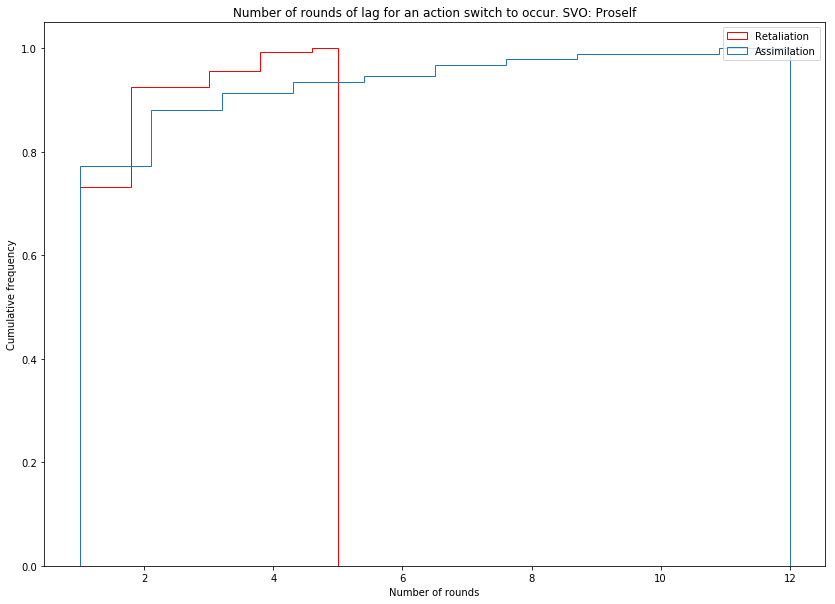

In [167]:
plt.figure(figsize = (14,10))
switches_self.loc[(switches_self.context == "D") & (switches_self.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches_self.loc[(switches_self.context == "C") & (switches_self.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to occur. SVO: Proself")
plt.show()

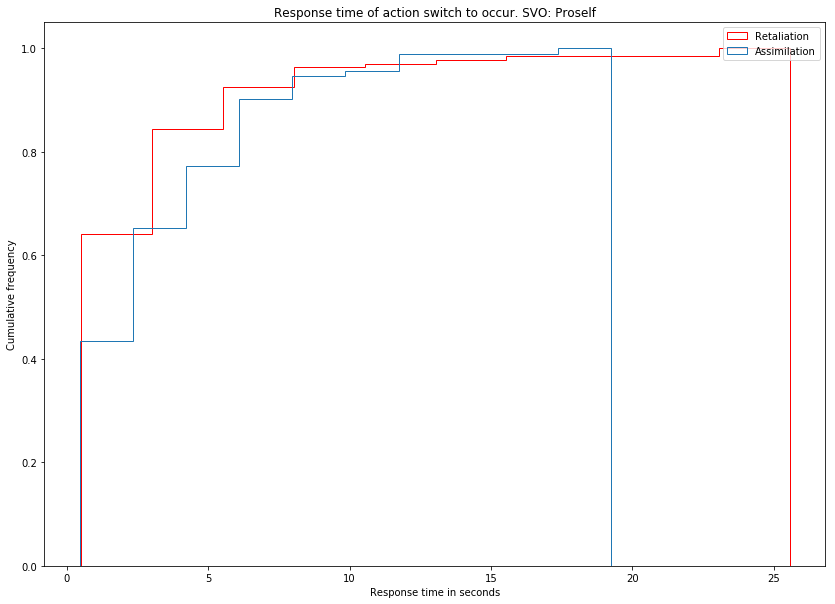

In [168]:
plt.figure(figsize = (14,10))
switches_self.loc[(switches_self.context == "D") & (switches_self.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches_self.loc[(switches_self.context == "C") & (switches_self.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Response time of action switch to occur. SVO: Proself")
plt.show()

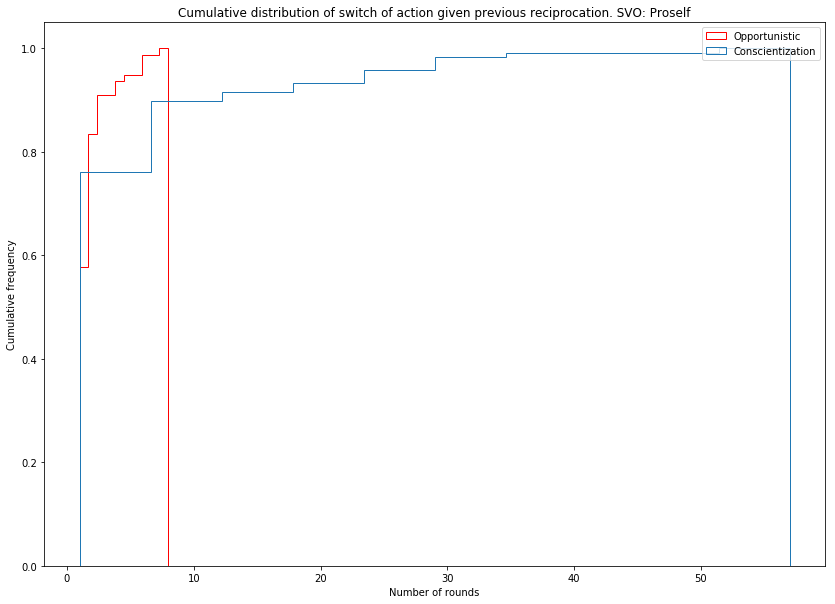

In [169]:
plt.figure(figsize = (14,10))
switches_self.loc[(switches_self.context == "C") & (switches_self.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches_self.loc[(switches_self.context == "D") & (switches_self.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Cumulative distribution of switch of action given previous reciprocation. SVO: Proself")
plt.show()

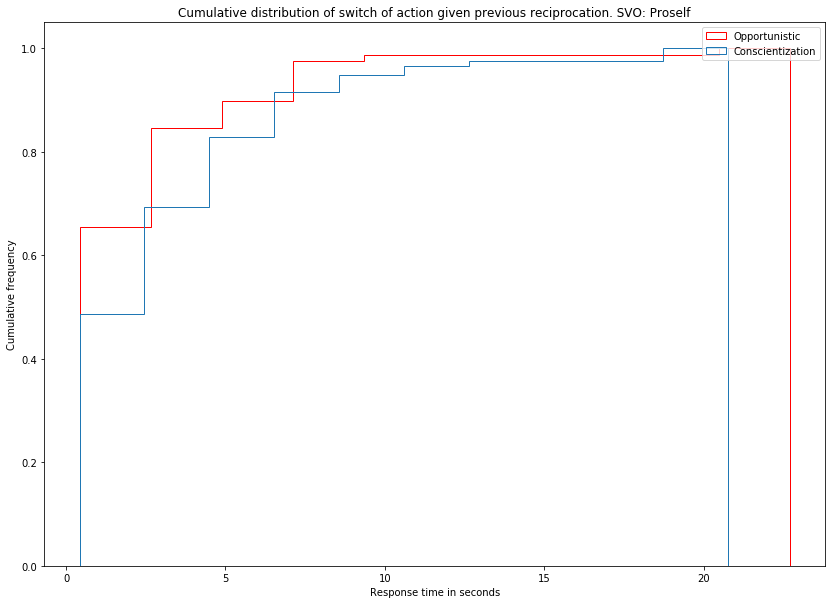

In [170]:
plt.figure(figsize = (14,10))
switches_self.loc[(switches_self.context == "C") & (switches_self.type == "CD")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches_self.loc[(switches_self.context == "D") & (switches_self.type == "DC")].rt.abs().plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Response time in seconds")
plt.title("Cumulative distribution of switch of action given previous reciprocation. SVO: Proself")
plt.show()

In [171]:
#DMM Modelling

fix["subj_idx"] = ""
fix.loc[fix.player.isin(actions.loc[actions.type == "Pro-social", "user"]), 'subj_idx'] = "Pro-social"
fix.loc[fix.player.isin(actions.loc[actions.type == "Pro-self", "user"]), 'subj_idx'] = "Pro-self"
fix

,Unnamed: 0,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,response,abs_time,prev,subj_idx
0,1800,1,s4m8_usuario2,D,['s4m8_usuario7'],C,4,4616.299868,-4.600,user,s4m8,fix,00D,0,4.600,00,Pro-social
1,1801,1,s4m8_usuario7,C,['s4m8_usuario2'],D,0,4081.799984,4.055,user,s4m8,fix,00C,1,4.055,00,Pro-social
2,1802,1,s4m8_usuario14,C,['s4m8_usuario13'],C,3,5450.299978,5.394,user,s4m8,fix,00C,1,5.394,00,Pro-social
3,1803,1,s4m8_usuario13,C,['s4m8_usuario14'],C,3,7837.399960,7.806,user,s4m8,fix,00C,1,7.806,00,Pro-social
4,1804,1,s4m8_usuario9,D,['s4m8_usuario10'],C,4,15086.500168,-15.067,user,s4m8,fix,00D,0,15.067,00,Pro-social
5,1805,1,s4m8_usuario10,C,['s4m8_usuario9'],D,0,12510.700226,12.483,user,s4m8,fix,00C,1,12.483,00,Pro-social
6,1806,1,s4m8_usuario8,C,['s4m8_usuario1'],C,3,10614.599943,10.559,user,s4m8,fix,00C,1,10.559,00,Pro-social
7,1807,1,s4m8_usuario1,C,['s4m8_usuario8'],C,3,4645.099878,4.622,user,s4m8,fix,00C,1,4.622,00,Pro-social
8,1808,1,s4m8_usuario11,D,['s4m8_usuario4'],D,1,26435.199976,-26.404,user,s4m8,fix,00D,0,26.404,00,Pro-social
9,1809,1,s4m8_usuario4,D,['s4m8_usuario11'],D,1,4593.400002,-4.568,user,s4m8,fix,00D,0,4.568,00,Pro-social


In [172]:
#test
model = modeler.fit_model(fix.loc[fix.actions == "CCC"], 5000, 200)
modeler.get_stats(model)

 [-----------------100%-----------------] 5000 of 5000 complete in 59.0 sec

,parameter,mean,std,2.5q,25q,50q,75q,97.5q,mc err
0,a,2.80471,1.40371,0.886627,1.765,2.50585,3.54297,6.26092,0.0598976
1,a_std,2.58949,1.0169,0.51685,1.94268,2.52503,3.20226,4.75862,0.0506903
2,a_subj.Pro-self,8.08403,2.06505,5.60324,6.62699,7.47013,8.95755,13.7342,0.188773
3,a_subj.Pro-social,7.68447,1.82206,5.93526,6.47963,6.91987,8.27502,12.5846,0.17965
4,v,0.577766,0.533625,-0.4777,0.455046,0.535232,0.645522,1.85319,0.0085668
5,v_std,0.518085,0.73139,0.00576211,0.0684262,0.212347,0.667893,2.68462,0.0300056
6,v_subj.Pro-self,0.543442,0.0630165,0.42247,0.505578,0.539006,0.580576,0.6772,0.00184958
7,v_subj.Pro-social,0.526327,0.0166405,0.493063,0.515361,0.526513,0.537713,0.558606,0.000372021
8,t,0.330457,0.115749,0.19257,0.265921,0.290563,0.363189,0.654975,0.00406099
9,t_std,0.188839,0.244719,0.00318659,0.0339154,0.0938494,0.249112,0.907475,0.0103218


In [174]:
actions = list(fix["actions"].unique())
modeler = ddm.HDDMmodelMaker()
st = time.time()
rounds = range(0, 100)
contextDf = pd.DataFrame()
window = 10
for a in actions:
    df = fix.loc[data["actions"]==a]
    try:
        model = modeler.fit_model(df, 5000, 200)
        print("\nModel: %s, time: %f\n" % (a, time.time() - st))
        modStats = modeler.get_stats(model, subjects = True)
        modStats["actions"] = a
        contextDf = contextDf.append(modStats, ignore_index = True)
    except: break
    contextDf.to_csv("./outputs/%s_svo.csv" % (a))

 [-----------------100%-----------------] 5000 of 5000 complete in 35.7 sec
Model: 00D, time: 36.078436

 [-----------------100%-----------------] 5000 of 5000 complete in 36.7 sec
Model: 00C, time: 73.223189

 [-----------------100%-----------------] 5000 of 5000 complete in 36.3 sec
Model: DCD, time: 110.060940

 [-----------------100%-----------------] 5000 of 5000 complete in 28.9 sec
Model: CDC, time: 139.513129

 [-----------------100%-----------------] 5000 of 5000 complete in 62.0 sec
Model: CCC, time: 202.097399

 [-----------------100%-----------------] 5000 of 5000 complete in 25.6 sec
Model: CDD, time: 228.186287

 [-----------------100%-----------------] 5000 of 5000 complete in 22.0 sec
Model: CCD, time: 250.676114

 [-----------------100%-----------------] 5000 of 5000 complete in 23.3 sec
Model: DDC, time: 274.439864

 [-----------------100%-----------------] 5000 of 5000 complete in 22.4 sec
Model: DCC, time: 297.265213

 [-----------------100%-----------------] 5000 o

In [177]:
contextDf.loc[(contextDf.actions.isin(["CDC", "CDD"])) & (contextDf.subject == "Pro-social")]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err,param,subject,actions
51,5.97663,0.818389,4.71708,5.37249,5.86358,6.47077,7.8823,0.0699386,a,Pro-social,CDC
55,0.697134,0.0535794,0.589651,0.662106,0.699086,0.734233,0.794579,0.00207976,v,Pro-social,CDC
59,0.0172114,0.0312787,1.09493e-15,1.28115e-07,0.000477231,0.0198692,0.114904,0.00197491,t,Pro-social,CDC
63,0.738515,0.0372355,0.666307,0.711496,0.739709,0.766498,0.807368,0.00336665,z,Pro-social,CDC
83,7.1171,1.22122,5.3606,6.21179,6.8676,7.82399,10.1093,0.103768,a,Pro-social,CDD
87,-0.714473,0.0701321,-0.85384,-0.761271,-0.714636,-0.665418,-0.57838,0.00175312,v,Pro-social,CDD
91,0.0016839,0.00455393,3.84733e-21,2.01597e-11,4.14147e-06,0.000731083,0.0167641,0.000232953,t,Pro-social,CDD
95,0.273957,0.0429452,0.188279,0.242987,0.277708,0.305927,0.35203,0.00381869,z,Pro-social,CDD


In [178]:
roundModel(fix, "actions", 10)

['00D', '00C', 'DCD', 'CDC', 'CCC', 'CDD', 'CCD', 'DDC', 'DCC', 'DDD']
[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 35.8 sec
Model: 00D, round 0, time: 36.162086

 [-----------------100%-----------------] 5000 of 5000 complete in 34.4 sec
Model: 00D, round 1, time: 71.164140

[1]
 [-----------------100%-----------------] 5000 of 5000 complete in 34.8 sec
Model: 00C, round 0, time: 106.503488

 [-----------------100%-----------------] 5000 of 5000 complete in 35.3 sec
Model: 00C, round 1, time: 142.362378

[  2   3   4   5   6   7  11  12  14  15  16  17  22  27  32  39  40  42
  44  48  49  50  53  54  57  58  69  72  81  89  95  97   8  10  13  19
  20  21  24  25  28  29  31  33  34  35  36  37  41  43  45  46  47  51
  52  55  56  59  60  61  62  63  64  65  66  67  68  70  71  74  75  76
  78  79  80  85  86  91  93  96  98 100   9  18  26  30  38  73  77  84
  87  88  90  92  94  99  23]
 [-----------------100%-----------------] 5000 of 5000 complete in 3

 [-----------------100%-----------------] 5000 of 5000 complete in 19.3 sec
Model: CDC, round 29, time: 3203.334628

 [-----------------100%-----------------] 5000 of 5000 complete in 19.8 sec
Model: CDC, round 30, time: 3223.674481

 [-----------------100%-----------------] 5000 of 5000 complete in 20.8 sec
Model: CDC, round 31, time: 3245.096944

 [-----------------100%-----------------] 5000 of 5000 complete in 20.1 sec
Model: CDC, round 32, time: 3265.754472

 [-----------------100%-----------------] 5000 of 5000 complete in 19.7 sec
Model: CDC, round 33, time: 3286.068262

 [-----------------100%-----------------] 5000 of 5000 complete in 29.4 sec
Model: CDC, round 34, time: 3316.070936

 [-----------------100%-----------------] 5000 of 5000 complete in 28.6 sec
Model: CDC, round 35, time: 3345.238587

 [-----------------100%-----------------] 5000 of 5000 complete in 28.9 sec
Model: CDC, round 36, time: 3374.729536

 [-----------------100%-----------------] 5000 of 5000 complete 

 [-----------------100%-----------------] 5000 of 5000 complete in 21.5 sec
Model: CCC, round 66, time: 6434.393495

 [-----------------100%-----------------] 5000 of 5000 complete in 21.7 sec
Model: CCC, round 67, time: 6456.638407

 [-----------------100%-----------------] 5000 of 5000 complete in 22.4 sec
Model: CCC, round 68, time: 6479.676568

 [-----------------100%-----------------] 5000 of 5000 complete in 22.7 sec
Model: CCC, round 69, time: 6502.997544

 [-----------------100%-----------------] 5000 of 5000 complete in 22.3 sec
Model: CCC, round 70, time: 6525.917620

 [-----------------100%-----------------] 5000 of 5000 complete in 22.2 sec
Model: CCC, round 71, time: 6548.792853

 [-----------------100%-----------------] 5000 of 5000 complete in 22.5 sec
Model: CCC, round 72, time: 6571.920627

 [-----------------100%-----------------] 5000 of 5000 complete in 22.6 sec
Model: CCC, round 73, time: 6595.198387

 [-----------------100%-----------------] 5000 of 5000 complete 

 [-----------------100%-----------------] 5000 of 5000 complete in 26.6 sec
Model: CDD, round 34, time: 7984.233115

 [-----------------100%-----------------] 5000 of 5000 complete in 26.4 sec
Model: CDD, round 35, time: 8011.439829

 [-----------------100%-----------------] 5000 of 5000 complete in 26.6 sec
Model: CDD, round 36, time: 8038.886474

 [-----------------100%-----------------] 5000 of 5000 complete in 26.2 sec
Model: CDD, round 37, time: 8065.876516

 [-----------------100%-----------------] 5000 of 5000 complete in 25.4 sec
Model: CDD, round 38, time: 8092.071577

 [-----------------100%-----------------] 5000 of 5000 complete in 25.7 sec
Model: CDD, round 39, time: 8118.591490

 [-----------------100%-----------------] 5000 of 5000 complete in 23.9 sec
Model: CDD, round 40, time: 8143.245003

 [-----------------100%-----------------] 5000 of 5000 complete in 22.5 sec
Model: CDD, round 41, time: 8166.482049

 [-----------------100%-----------------] 5000 of 5000 complete 

 [-----------------100%-----------------] 5000 of 5000 complete in 20.3 sec
Model: CCD, round 71, time: 10992.241096

 [-----------------100%-----------------] 5000 of 5000 complete in 18.0 sec
Model: CCD, round 72, time: 11011.000725

 [-----------------100%-----------------] 5000 of 5000 complete in 17.7 sec
Model: CCD, round 73, time: 11029.487335

 [-----------------100%-----------------] 5000 of 5000 complete in 18.4 sec
Model: CCD, round 74, time: 11048.701990

 [-----------------100%-----------------] 5000 of 5000 complete in 19.3 sec
Model: CCD, round 75, time: 11068.760105

 [-----------------100%-----------------] 5000 of 5000 complete in 20.1 sec
Model: CCD, round 76, time: 11089.661908

 [-----------------100%-----------------] 5000 of 5000 complete in 20.0 sec
Model: CCD, round 77, time: 11110.443559

 [-----------------100%-----------------] 5000 of 5000 complete in 21.1 sec
Model: CCD, round 78, time: 11132.305116

 [-----------------100%-----------------] 5000 of 5000 c

 [-----------------100%-----------------] 5000 of 5000 complete in 19.6 sec
Model: DDC, round 38, time: 12518.947633

 [-----------------100%-----------------] 5000 of 5000 complete in 20.1 sec
Model: DDC, round 39, time: 12539.919217

 [-----------------100%-----------------] 5000 of 5000 complete in 22.2 sec
Model: DDC, round 40, time: 12562.926991

 [-----------------100%-----------------] 5000 of 5000 complete in 20.9 sec
Model: DDC, round 41, time: 12584.698072

 [-----------------100%-----------------] 5000 of 5000 complete in 20.4 sec
Model: DDC, round 42, time: 12605.947220

 [-----------------100%-----------------] 5000 of 5000 complete in 21.3 sec
Model: DDC, round 43, time: 12628.112681

 [-----------------100%-----------------] 5000 of 5000 complete in 21.3 sec
Model: DDC, round 44, time: 12650.251719

 [-----------------100%-----------------] 5000 of 5000 complete in 21.0 sec
Model: DDC, round 45, time: 12672.050341

 [-----------------100%-----------------] 5000 of 5000 c

 [-----------------100%-----------------] 5000 of 5000 complete in 16.9 sec
Model: DCC, round 74, time: 15447.619823

 [-----------------100%-----------------] 5000 of 5000 complete in 18.2 sec
Model: DCC, round 75, time: 15466.743330

 [-----------------100%-----------------] 5000 of 5000 complete in 19.3 sec
Model: DCC, round 76, time: 15487.035351

 [-----------------100%-----------------] 5000 of 5000 complete in 17.0 sec
Model: DCC, round 77, time: 15504.984195

 [-----------------100%-----------------] 5000 of 5000 complete in 20.9 sec
Model: DCC, round 78, time: 15526.854019

 [-----------------100%-----------------] 5000 of 5000 complete in 20.7 sec
Model: DCC, round 79, time: 15548.483962

 [-----------------100%-----------------] 5000 of 5000 complete in 19.1 sec
Model: DCC, round 80, time: 15568.552895

 [-----------------100%-----------------] 5000 of 5000 complete in 20.3 sec
Model: DCC, round 81, time: 15589.786938

 [-----------------100%-----------------] 5000 of 5000 c

In [53]:
def plot_rounds_context_svo(groups, param, title, normalize = False, svo = ['Pro-social', 'Pro-self']):
    plt.figure(figsize = (10,10))
    for g in groups:
        data = pd.read_csv("./outputs/svo/%s_rounds.csv" % (g))
        data['parameter'], data['svo'] =  data['parameter'].str.split('_', 1).str
        data['svo'] = data['svo'].str.replace('subj.','')
        data = data.loc[data.svo.isin(['Pro-social', 'Pro-self'])]
        for u in svo:
            param_df = data.loc[(data.parameter == param) & (data.svo == u), ["mean", "round"]]
            if normalize:
                if param == "v":
                    param_df["mean"] = param_df["mean"].abs()
            plt.plot(param_df["round"],param_df["mean"], "-o", label = "%s-%s" % (g , u))
    plt.xlabel("Rounds")
    plt.ylabel(param)
    plt.legend(loc = "best")
    plt.title(title)

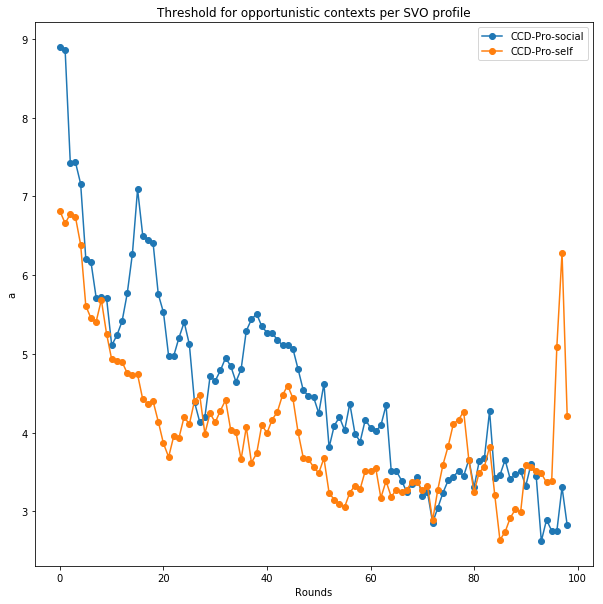

In [64]:
plot_rounds_context_svo(["CCD"], "a", "Threshold for opportunistic contexts per SVO profile", normalize = True, svo = ["Pro-social", "Pro-self"])

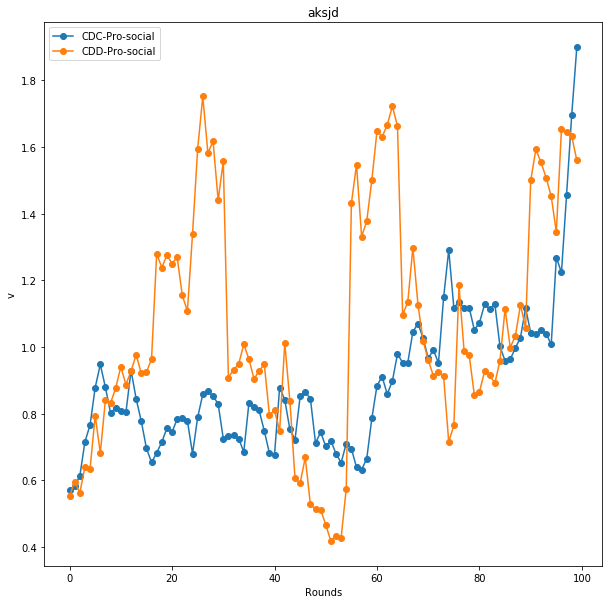

In [48]:
plot_rounds_context_svo(["CDC", "CDD"], "v", "aksjd", normalize = True, svo = ["Pro-social"])

## Changing PD

In [237]:
dataC = data2.loc[data2.treatment == "changing"]


In [238]:

#Time intensive

dataC["actions"] = ""
nrounds = dataC["round"].unique()
players = dataC.player.unique()
for r in nrounds:
    for p in players:
        action1 = ""
        if r == 1: action1 = "00"
        else:
            action1 = "%s%s" % (dataC.loc[(dataC["round"] == r-1) & (dataC["player"] == p), "action_player"].item(),
                                dataC.loc[(dataC["round"] == r-1) & (dataC["player"] == p), "action_opponent"].item())
        dataC.loc[(dataC["round"] == r) & (dataC["player"] == p), ['actions']] = "%s%s" % (action1, dataC.loc[(dataC["round"] == r) & (dataC["player"] == p), "action_player"].item())
dataC

/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/eladiomontero/opt/anaconda3/envs/decTimesEnv/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,round,player,action_player,opponent,action_opponent,payoff,time_php,time_js,who_played,session,treatment,actions
3200,1,s5m20_usuario1,D,['s5m20_usuario12'],D,1,6705.299854,6678,user,s5m20,changing,00D
3201,1,s5m20_usuario2,C,['s5m20_usuario10'],D,0,4630.299807,4601,user,s5m20,changing,00C
3202,1,s5m20_usuario3,D,['s5m20_usuario5'],D,1,12807.000160,12777,user,s5m20,changing,00D
3203,1,s5m20_usuario4,C,['s5m20_usuario13'],C,3,2428.100109,2399,user,s5m20,changing,00C
3204,1,s5m20_usuario5,D,['s5m20_usuario3'],D,1,17117.100000,17088,user,s5m20,changing,00D
3205,1,s5m20_usuario6,D,['s5m20_usuario18'],C,4,5645.900011,5609,user,s5m20,changing,00D
3206,1,s5m20_usuario7,C,['s5m20_usuario17'],D,0,4085.600138,4066,user,s5m20,changing,00C
3207,1,s5m20_usuario8,C,['s5m20_usuario11'],D,0,7777.400017,7746,user,s5m20,changing,00C
3208,1,s5m20_usuario9,D,['s5m20_usuario14'],D,1,4185.799837,4159,user,s5m20,changing,00D
3209,1,s5m20_usuario10,D,['s5m20_usuario2'],C,4,7459.399939,7406,user,s5m20,changing,00D


In [246]:
dataC.rename(columns={'time_js': 'rt'}, inplace=True)
dataC['rt'] = dataC.rt.astype(int)
dataC["response"] = dataC["action_player"]
dataC.loc[dataC['response'] == "C", "response"] = 1.0
dataC.loc[dataC['response'] == "D", "response"] = 0.0
dataC["rt"] = dataC["rt"] / 1000
dataC = hddm.utils.flip_errors(dataC)
dataC["abs_time"] = dataC["rt"].abs()
dataC.head()

,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,prev,response,abs_time
3200,1,s5m20_usuario1,D,['s5m20_usuario12'],D,1,6705.299854,-0.006,user,s5m20,changing,00D,00,0,0.006
3201,1,s5m20_usuario2,C,['s5m20_usuario10'],D,0,4630.299807,0.004,user,s5m20,changing,00C,00,1,0.004
3202,1,s5m20_usuario3,D,['s5m20_usuario5'],D,1,12807.000160,-0.012,user,s5m20,changing,00D,00,0,0.012
3203,1,s5m20_usuario4,C,['s5m20_usuario13'],C,3,2428.100109,0.002,user,s5m20,changing,00C,00,1,0.002
3204,1,s5m20_usuario5,D,['s5m20_usuario3'],D,1,17117.100000,-0.017,user,s5m20,changing,00D,00,0,0.017


In [67]:
dataC = pd.read_csv("changingActions.csv")
dataC.rt = (dataC.rt) * 1000
dataC.abs_time = (dataC.abs_time) * 1000
dataC

,Unnamed: 0,round,player,action_player,opponent,action_opponent,payoff,time_php,rt,who_played,session,treatment,actions,prev,response,abs_time
0,3200,1,s5m20_usuario1,D,['s5m20_usuario12'],D,1,6705.299854,-6.0,user,s5m20,changing,00D,00,0,6.0
1,3201,1,s5m20_usuario2,C,['s5m20_usuario10'],D,0,4630.299807,4.0,user,s5m20,changing,00C,00,1,4.0
2,3202,1,s5m20_usuario3,D,['s5m20_usuario5'],D,1,12807.000160,-12.0,user,s5m20,changing,00D,00,0,12.0
3,3203,1,s5m20_usuario4,C,['s5m20_usuario13'],C,3,2428.100109,2.0,user,s5m20,changing,00C,00,1,2.0
4,3204,1,s5m20_usuario5,D,['s5m20_usuario3'],D,1,17117.100000,-17.0,user,s5m20,changing,00D,00,0,17.0
5,3205,1,s5m20_usuario6,D,['s5m20_usuario18'],C,4,5645.900011,-5.0,user,s5m20,changing,00D,00,0,5.0
6,3206,1,s5m20_usuario7,C,['s5m20_usuario17'],D,0,4085.600138,4.0,user,s5m20,changing,00C,00,1,4.0
7,3207,1,s5m20_usuario8,C,['s5m20_usuario11'],D,0,7777.400017,7.0,user,s5m20,changing,00C,00,1,7.0
8,3208,1,s5m20_usuario9,D,['s5m20_usuario14'],D,1,4185.799837,-4.0,user,s5m20,changing,00D,00,0,4.0
9,3209,1,s5m20_usuario10,D,['s5m20_usuario2'],C,4,7459.399939,-7.0,user,s5m20,changing,00D,00,0,7.0


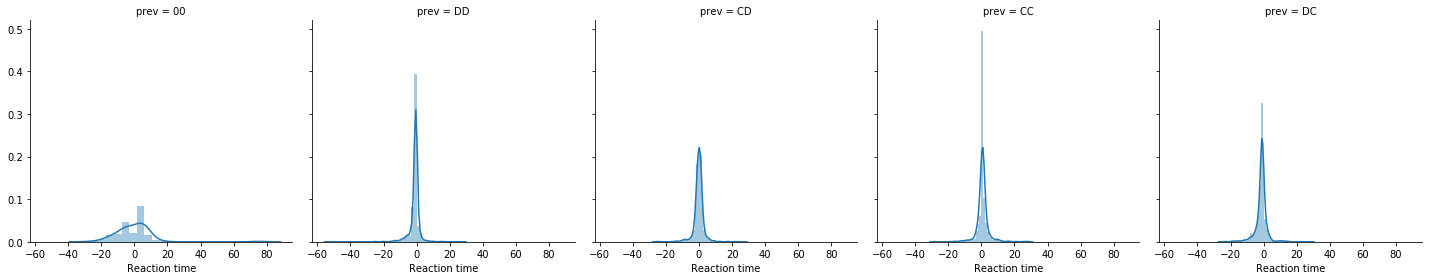

In [68]:
dataC["prev"] = dataC.actions.str[:2]
g = sns.FacetGrid(dataC, col="prev", height = 4)
g.map(sns.distplot, "rt")
g.add_legend()
g.set(xlabel = "Reaction time")

[Text(0,0.5,'Previous actions'),
 Text(0.5,0,'Row count'),
 Text(0.5,1,'Actions after given context')]

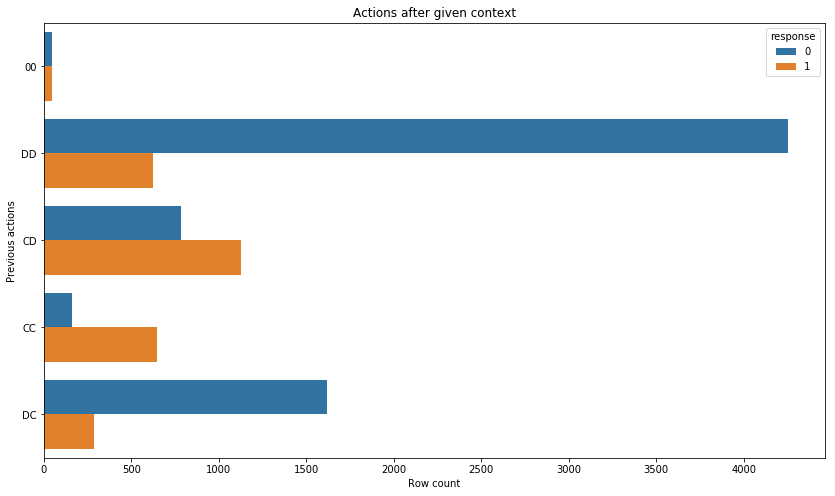

In [248]:
plt.figure(figsize = (14,8))
ax = sns.countplot(y="prev", hue="response", data=dataC)
ax.set(xlabel='Row count', ylabel='Previous actions', title = "Actions after given context")


In [77]:
switches2 = pd.DataFrame()
actions2 = pd.DataFrame()
users2 = dataC.player.unique()
for u in users2:
    df = dataC.loc[dataC.player == u]
    df = df.sort_values(by = "round", ascending = True)
    opp = str(df.opponent.unique())
    acc1 = df.action_player.values
    acc2 = df.action_opponent.values
    rt = df["rt"].values
    switches2 = switches2.append(actionChange(acc1, acc2, u, opp, rt))
    actions2 = actions2.append(actionCounts(df.actions, u), ignore_index=True)
actions2


,00C,00D,CCC,CCD,CDC,CDD,DCC,DCD,DDC,DDD,type,user
0,0.0,1.0,21.0,1.0,6.0,20.0,1.0,22.0,20.0,8.0,Pro-self,s5m20_usuario1
1,1.0,0.0,2.0,5.0,4.0,7.0,4.0,34.0,7.0,36.0,Pro-self,s5m20_usuario2
2,0.0,1.0,22.0,0.0,34.0,9.0,8.0,4.0,2.0,20.0,Pro-social,s5m20_usuario3
3,1.0,0.0,16.0,0.0,1.0,24.0,21.0,2.0,3.0,32.0,Pro-self,s5m20_usuario4
4,0.0,1.0,27.0,1.0,15.0,15.0,8.0,3.0,9.0,21.0,Pro-social,s5m20_usuario5
5,0.0,1.0,1.0,0.0,0.0,2.0,2.0,43.0,0.0,51.0,Pro-self,s5m20_usuario6
6,1.0,0.0,27.0,0.0,52.0,5.0,2.0,1.0,3.0,9.0,Pro-social,s5m20_usuario7
7,1.0,0.0,27.0,0.0,24.0,14.0,7.0,8.0,7.0,12.0,Pro-social,s5m20_usuario8
8,0.0,1.0,5.0,3.0,2.0,17.0,0.0,25.0,20.0,27.0,Pro-self,s5m20_usuario9
9,0.0,1.0,5.0,5.0,6.0,13.0,2.0,28.0,17.0,23.0,Pro-self,s5m20_usuario10


In [71]:
switches2.groupby(["context", "type"]).count()

lag  round   rt  subject
context type                          
C       CD    159    159  159      159
        DC    290    290  290      290
D       CD    783    783  783      783
        DC    626    626  626      626

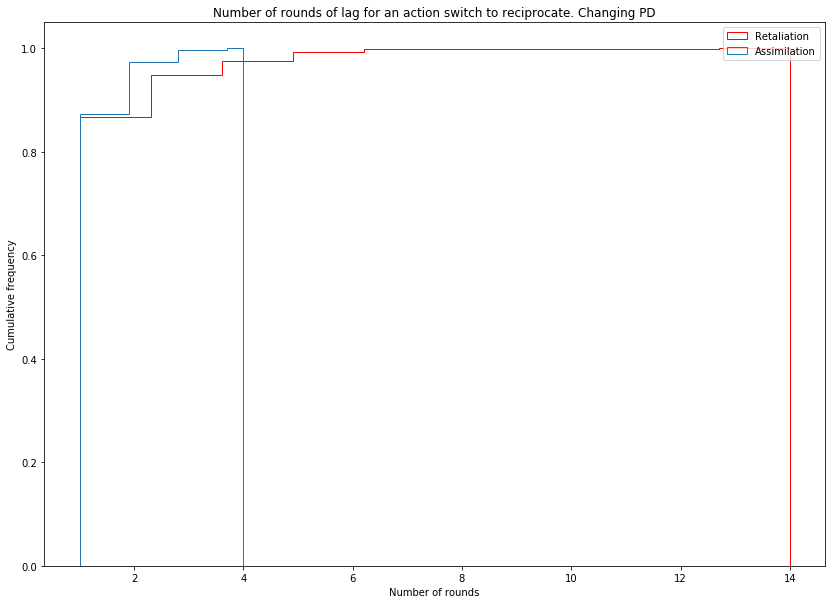

In [90]:


plt.figure(figsize = (14,10))
switches2.loc[(switches2.context == "D") & (switches2.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Retaliation")

switches2.loc[(switches2.context == "C") & (switches2.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to reciprocate. Changing PD")
plt.show()

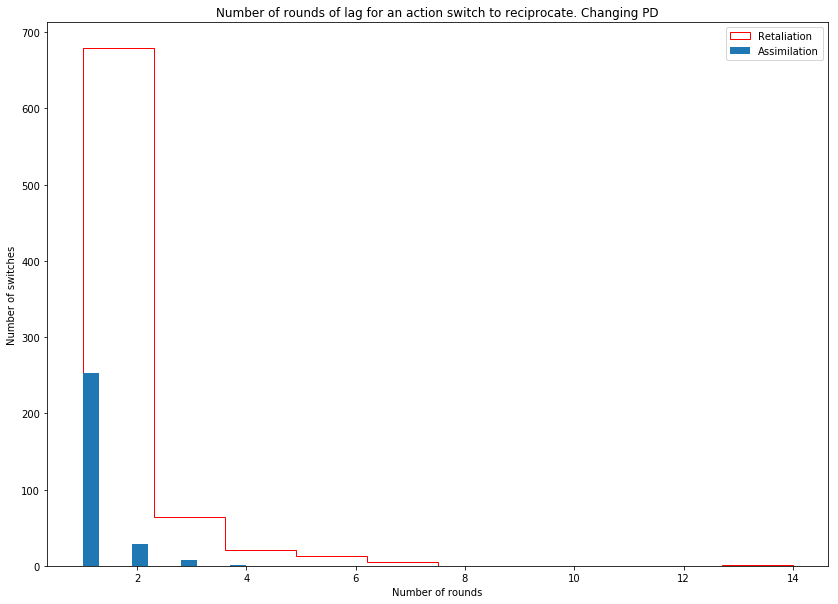

In [92]:


plt.figure(figsize = (14,10))
switches2.loc[(switches2.context == "D") & (switches2.type == "CD")].lag.plot(
    kind = "hist",
    histtype='step',
    color = "r",
    label = "Retaliation")

switches2.loc[(switches2.context == "C") & (switches2.type == "DC")].lag.plot(
    kind = "hist",
    label = "Assimilation"
)
plt.legend(loc = "best")
plt.ylabel("Number of switches")
plt.xlabel("Number of rounds")
plt.title("Number of rounds of lag for an action switch to reciprocate. Changing PD")
plt.show()

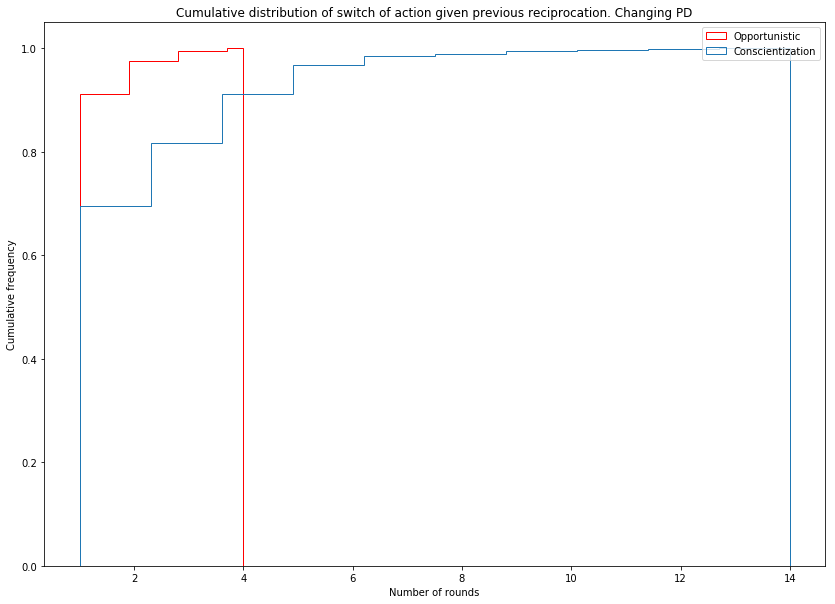

In [93]:
plt.figure(figsize = (14,10))
switches2.loc[(switches2.context == "C") & (switches2.type == "CD")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    color = "r",
    label = "Opportunistic")

switches2.loc[(switches2.context == "D") & (switches2.type == "DC")].lag.plot(
    kind = "hist",
    cumulative = 1,
    density = True,
    histtype='step',
    label = "Conscientization"
)
plt.legend(loc = "best")
plt.ylabel("Cumulative frequency")
plt.xlabel("Number of rounds")
plt.title("Cumulative distribution of switch of action given previous reciprocation. Changing PD")
plt.show()

In [84]:
actions2["type"].value_counts()

Pro-self      75
Pro-social    21
Name: type, dtype: int64

# Subjects analysis

In [ ]:
import seaborn as sns
sns.set(style="white")
import numpy as np
from scipy import stats

In [ ]:
files = ["s3m7","s4m8","s5m20","s6m22","s7m22","s8n3","s9n3","s10n5","s11n9","s13n12","s12n11"]
dataLoader = loader.dataLoader()

data_s = dataLoader.parse_files(files)
data_s = dataLoader.formatData(data_s, subjects=True)

fixed_sj = data_s[data_s.treatment == "fix"]
changing_sj = data_s[data_s.treatment == "changing"]
weak_sj = data_s[data_s.treatment == "weak"]

modeler = ddm.HDDMmodelMaker()
f_rounds_s = pd.DataFrame()
c_rounds_s = pd.DataFrame()
w_rounds_s = pd.DataFrame()

In [ ]:
def plot_params(stats_df, title):
    parameters = ["a", "v", "z", "t"]
    fig, axs = plt.subplots(4, 4)
    fig.set_size_inches(13,13) 
    fig.suptitle('Correlation plots with Pearson coefficient, %s, (subjects model)' % (title), fontsize=16)
    i = 0
    j = 0
    for p2 in parameters:
        j = 0
        for p in parameters:
            x = stats_df.loc[stats_df.param == p, "mean"]
            y = stats_df.loc[stats_df.param == p2, "mean"]
            axs[i,j].scatter(x, y)
            axs[i,j].set_title("Corr: %f, p value: %s" % (np.round(stats.pearsonr(x,y)[0], 2), np.round(stats.pearsonr(x,y)[1], 4)))
            j = j + 1
        i = i + 1

    axs.flat[0].set(ylabel='a')
    axs.flat[4].set(ylabel='v')
    axs.flat[8].set(ylabel='z')
    axs.flat[12].set(ylabel='t')

    axs.flat[12].set(xlabel='a')
    axs.flat[13].set(xlabel='v')
    axs.flat[14].set(xlabel='z')
    axs.flat[15].set(xlabel='t')

In [ ]:
def pearson(x, y, **kws):
    ax = plt.gca()
    r, p = stats.pearsonr(x, y)
    ax.annotate("r = %f, p = %f" % (r,p),
                xy=(.1, .9), xycoords=ax.transAxes)

def spearman(x, y, **kws):
    ax = plt.gca()
    s, p = stats.spearmanr(x, y)
    ax.annotate("s = %f, p = %f" % (s,p),
                xy=(.1, .9), xycoords=ax.transAxes)
    
    

In [ ]:
def grid_plot(stats_df):
    z = list(stats_df.loc[stats_df.param == "z", "mean"])
    a = list(stats_df.loc[stats_df.param == "a", "mean"])
    t = list(stats_df.loc[stats_df.param == "t", "mean"])
    v = list(stats_df.loc[stats_df.param == "v", "mean"])

    dict = {"a": a , "v": v, "z":z, "t": t}

    samp = pd.DataFrame(dict)
    g = sns.PairGrid(samp, palette=["red"])
    g.map_upper(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_lower(corrfunc)
    g.map_upper(spearman)

In [ ]:

f_all = modeler.fit_model(fixed_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(f_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(pearson)
g.map_upper(spearman)


In [ ]:
#0-25
f_25 = modeler.fit_model(fixed_sj[fixed_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(f_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
f_26_50 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
f_51_75 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
f_76_100 = modeler.fit_model(fixed_sj[fixed_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(f_76_100, True)
grid_plot(stats_df)

In [ ]:
##Changing

In [ ]:

c_all = modeler.fit_model(changing_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(c_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


In [ ]:
#0-25
c_25 = modeler.fit_model(changing_sj[changing_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(c_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
c_26_50 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
c_51_75 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
c_76_100 = modeler.fit_model(changing_sj[changing_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_76_100, True)
grid_plot(stats_df)

In [ ]:
##Weak

In [ ]:

w_all = modeler.fit_model(weak_sj, 1000, 400)


In [ ]:
stats_df = modeler.get_stats(w_all, True)

In [ ]:
z = list(stats_df.loc[stats_df.param == "z", "mean"])
a = list(stats_df.loc[stats_df.param == "a", "mean"])
t = list(stats_df.loc[stats_df.param == "t", "mean"])
v = list(stats_df.loc[stats_df.param == "v", "mean"])

dict = {"a": a , "v": v, "z":z, "t": t}

samp = pd.DataFrame(dict)
g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


In [ ]:
#0-25
w_25 = modeler.fit_model(weak_sj[weak_sj["round"] <= 25], 1000, 400)
stats_df = modeler.get_stats(w_25, True)
grid_plot(stats_df)

In [ ]:
#25-50
rang = range(26,50)
w_26_50 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_26_50, True)
grid_plot(stats_df)

In [ ]:
#51-75
rang = range(51,75)
w_51_75 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(c_51_75, True)
grid_plot(stats_df)

In [ ]:
#76-100
rang = range(76,100)
w_76_100 = modeler.fit_model(weak_sj[weak_sj["round"].isin(rang)], 1000, 400)
stats_df = modeler.get_stats(w_76_100, True)
grid_plot(stats_df)

## Simulating data to test package

In [ ]:
D = 1 #Difusion constant
z =10 # Initial condition (bias)
v = .1 #Drift
alpha = 12 # upper barrier value
N = 10000
t_mc = [0] * N 
dt = 0.01

In [ ]:
for i in range(1, N):
   x = z
   n = 0
   while x > 0:
      x = x - v * dt + D ** .5 * np.random.normal() * dt**0.5
      n = n + 1
      if x > alpha:
         x = z
         n = 0
   t_mc[i] = n * dt

In [ ]:
plt.figure(figsize = (14,10))
plt.plot(t_mc)

In [ ]:
## Second method

#Simulate random walk with a drift. 
#You start from z and in each time step you add a random number from Gaussian distribution
#and constant drift v towards one of the decisions. 
#You continue until you cross one of the barriers a or -a and note that as a decision time with the decision. 
#Then fit this distribution fro which you know exactly z, v and a using the package.
rounds = 1
sim = pd.DataFrame()

for r in range(rounds):
    subjects = 10000
    dec_times = [0] * subjects
    responses = [0] * subjects
    for sub in range(subjects):
        z = 2 # Initial condition (bias)
        v = -0.6  # Drift
        a = 5  # upper barrier value
        N = 100000
        t0 = 0.01  # non decision time
        s = z  # deliberation status
        D = 1 #Difusion constant
        for i in range(N):
            rand = np.random.normal()
            if (s < a) and s > 0:
                s = s - v * t0 + D ** .5 * np.random.randn() * t0**0.5
                #dt = dt + 1
            else:
                if s > 0:
                    responses[sub] = 1
                dec_times[sub] = t0 * i
                break
        if dec_times[sub] == 0.0:
            print ("no decision")
                
    dic = {"player": range(subjects), "rt": dec_times, 'response': responses, "round": [r] * subjects}
    sim_times = pd.DataFrame(dic)
    if r == 0:
        sim = sim_times
    else:
        sim = sim.append(sim_times, ignore_index = True)

In [ ]:
sim.loc[sim.response == 1, "rt"].mean()

In [ ]:
sim.loc[sim.response == 0, "rt"].mean()

In [ ]:
sim.to_csv("sim_times.csv")

In [ ]:
#Load to HDDM

sim = hddm.load_csv("sim_times.csv")
sim = data = hddm.utils.flip_errors(sim)
sim

In [ ]:
plt.figure(figsize = (14,10))
plt.hist(sim.rt, bins = "auto")
plt.xlabel("Response Times (seconds)")
plt.ylabel("Frequency")
plt.title("RT simulated")
plt.show()

In [ ]:
a_values = []
for i in range(10):
    np.random.seed(1234)
    random.seed(1234)
    model = hddm.HDDM(sim, bias = True)
    model.sample(1000, burn = 100)
    a_values.append(model.gen_stats().loc[:, "mean"][0])


In [ ]:
np.mean(a_values)

In [ ]:
model = hddm.HDDM(sim, bias = True)
model.sample(10000, burn = 100)
model.gen_stats()